This project involved analyzing a comprehensive HR dataset encompassing various employee attributes and performance metrics. The dataset included details on employee demographics (age, gender, race, marital status, etc.), employment history (hire date, termination date, reasons for termination), compensation (salary), performance evaluations, engagement survey results, and absenteeism records. The goal was to extract meaningful insights regarding employee performance, identify factors influencing employee turnover and satisfaction, and explore potential correlations between different employee characteristics and their performance scores.

My analysis involved several key steps, including data cleaning, exploratory data analysis, and statistical modeling. I explored relationships between performance scores and salary, tenure, demographics, department, and management styles. Additionally, I investigated the factors contributing to employee attrition and employee satisfaction levels. The results were visualized using various charts and graphs to facilitate clear communication and interpretation.

I. Performance and Compensation
Task: Investigate the correlation between PerformanceScore and Salary. 
Question: Do higher performers receive higher salaries? The impact of SpecialProjectsCount have to be cincidered.

II. Performance and Demographics
Task: Analyze if there's a relationship between PerformanceScore and demographic factors like Sex, RaceDesc, HispanicLatino, or Age (calculated from DOB). 
Be cautious about interpreting these results. Focus is on identifying the potential disparities, not making causal claims.

III. Absenteeism and Performance
Task: To examine the correlation between Absences and PerformanceScore. 
Question: Do employees with higher absences tend to perform worse? Consider also the interaction with DaysLateLast30.

IV. Departmental Performance
Task: To compare the average PerformanceScore across different Departments. 
Question: Are certain departments consistently outperforming others?

V. Recruitment Source and Performance
Task: To analyze if the RecruitmentSource has an impact on PerformanceScore or employee retention (Termd).

VI. Tenure and Performance
Task: To explore if employee tenure (time in the company, calculated from Date ofHire) correlates with PerformanceScore or EmpSatisfaction.

VII. Marital Status and Performance
Task: To investigate if MaritalStatusID or MaritalDesc is related to PerformanceScore or Absences.

VIII. Manager Impact
Task: To analyze if employees under certain managers (ManagerName or ManagerID) exhibit different performance patterns.

Other insights to explore

Employee Turnover
Task: To analyze the TermReason and DateofTermination to understand why employees leave the company. Segment the reasons and explore potential trends.

Diversity and Inclusion
Task: To analyze the representation of different demographic groups (RaceDesc, HispanicLatino, Sex) within the company. To calculate representation ratios for each department.

Employee Engagement and Satisfaction
Task: To explore relationships between EngagementSurvey, EmpSatisfaction, PerformanceScore, and Absences.

Salary Distribution
Task To analyze the distribution of Salary across departments, positions, and performance levels. To Check for potential pay gaps.

Time Series Analysis
Task: To use Date of Hire, LastPerformanceReview_Date, and DateofTermination for time-series analyses to spot trends in hiring, performance, and turnover.

Tools:

Python libraries like Pandas, NumPy, Scikit-learn, and visualization libraries (Matplotlib, Seaborn) will be helpful. Google project IDX Cloud SaaS will used for edidting.

In [42]:
import pandas as pd 
#Pandas is a go-to library for data manipulation and analysis. 
# It provides the DataFrame object, which is essentially a table-like data structure 
# that allows to store and work with  dataset efficiently.
#Pandas module is needed Almost always when dealing with datasets. such as: 
#Read data from various file formats (CSV, Excel, etc.)
#Clean and prepare data (handle missing values, convert data types)
#Filter, sort, and transform data
#Perform data aggregation and summarization

import numpy as np
#NumPy is the fundamental library for numerical computing in Python. It provides powerful 
#N-dimensional arrays (nd array) and a vast collection of mathematical functions to work 
#with them. Even though Pandas uses NumPy under the hood, One may still need to call NumPy
#directly to work with arrays for calculations.
#Numpy is needed When One're performing numerical operations, especially on arrays and matrices. 
#This is very common in machine learning.

import matplotlib.pyplot as plt
#Matplotlib is the most widely used plotting library in Python.
#You use it to create various types of visualizations, such as line plots, scatter plots, histograms, and more.
#The module is needed Whenever one want to create static, interactive, or animated visualizations of data.
#This is crucial for exploratory data analysis and presenting your findings.

import seaborn as sns
#Seaborn builds upon Matplotlib and provides a higher-level interface for creating statistically 
#informative and visually appealing graphics.
#Seaborn is excellent for visualizations that reveal relationships and distributions in data
#(e.g., heatmaps for correlation matrices, pair plots for visualizing relationships between multiple variables).
#It often produces more polished plots compared to basic Matplotlib plots.

import sklearn
#Scikit-learn is the leading machine learning library in Python.
#It provides implementations of a wide variety of algorithms for classification, regression,
#clustering, dimensionality reduction, model selection, and preprocessing.
#sklearn need Whenever one is doing machine learning tasks.

from sklearn.linear_model import LinearRegression
#This imports the LinearRegression class, which implements linear regression models.
#this import is needed When one want to create and use a linear regression model.
# Linear regression is used for predicting a continuous target variable based on one or more predictor variables.

In [43]:
#After installing necessary module, let now import owr csv datasets file in editing software
#hrd = HR dataset
hrd = pd.read_csv('HRDataset.csv')
hrd.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [44]:
hrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [45]:
hrd.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [46]:
hrd.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

Data Cleaning and Preprocessing Considerations

Missing Values: Handle missing values in columns like DateofTermination (for current employees) and Salary. Decide on imputation or removal strategies.

Data Type Conversions: Ensure correct data types (e.g., DOB as a date, Salary as numeric).

Redundant Columns: Determine if columns like MaritalStatusID and MaritalDesc provide redundant information.

As you can see most of datatype is object and int64, let do some data type conversion we start from data

In [47]:
# Convert to datetime
hrd['DOB'] = pd.to_datetime(hrd['DOB'])
hrd['DateofHire'] = pd.to_datetime(hrd['DateofHire'])
hrd['DateofTermination'] = pd.to_datetime(hrd['DateofTermination'])
hrd['LastPerformanceReview_Date'] = pd.to_datetime(hrd['LastPerformanceReview_Date'])

# convert zip to string
hrd['Zip'] = hrd['Zip'].astype('string')

# convert Employee_Name to string
hrd['Employee_Name'] = hrd['Employee_Name'].astype('string')

# Convert to boolean
hrd['MarriedID'] = hrd['MarriedID'].astype(bool)
hrd['Termd'] = hrd['Termd'].astype(bool)
hrd['FromDiversityJobFairID'] = hrd['FromDiversityJobFairID'].astype(bool)

# Convert to category
categorical_cols = ['Position', 'State', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore']
for col in categorical_cols:
    hrd[col] = hrd[col].astype('category')


/tmp/ipykernel_106/2071733026.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hrd['DOB'] = pd.to_datetime(hrd['DOB'])


In [48]:
hrd.dtypes

Employee_Name                 string[python]
EmpID                                  int64
MarriedID                               bool
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                  bool
Salary                                 int64
Termd                                   bool
PositionID                             int64
Position                            category
State                               category
Zip                           string[python]
DOB                           datetime64[ns]
Sex                                 category
MaritalDesc                         category
CitizenDesc                         category
HispanicLatino                      category
RaceDesc                            category
DateofHire                    datetime64[ns]
DateofTerm

I. Performance and Compensation
Task: Investigate the correlation between PerformanceScore and Salary. 
Question: Do higher performers receive higher salaries? The impact of SpecialProjectsCount have to be cincidered.

/tmp/ipykernel_106/3148865141.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  performance_salary = hrd.groupby('PerformanceScore')['Salary'].mean().reset_index()
/tmp/ipykernel_106/3148865141.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PerformanceScore', y='Salary', data=performance_salary, palette='viridis')


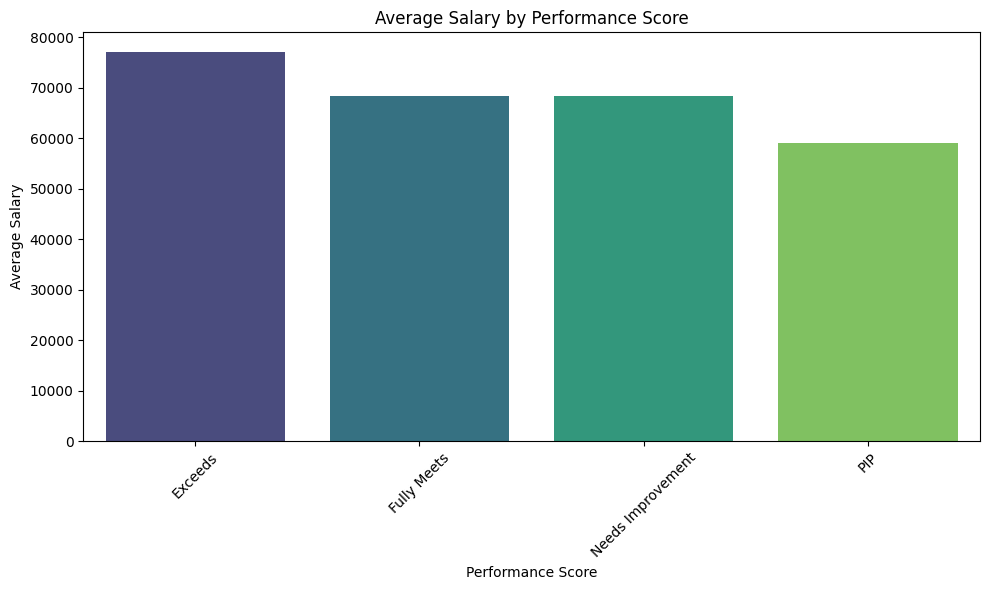

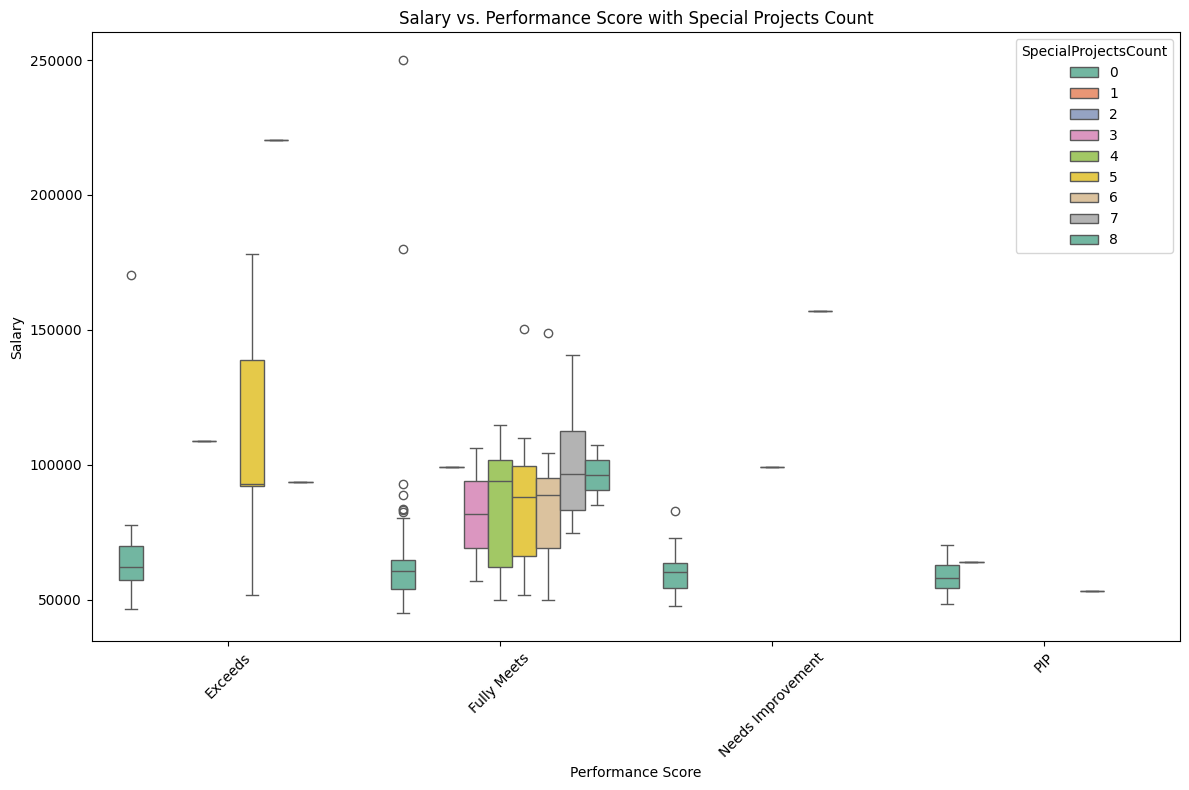

/tmp/ipykernel_106/3148865141.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_performance['PerformanceScoreNumeric'] = numeric_performance['PerformanceScore'].map({'Exceeds': 2, 'Fully Meets': 1})


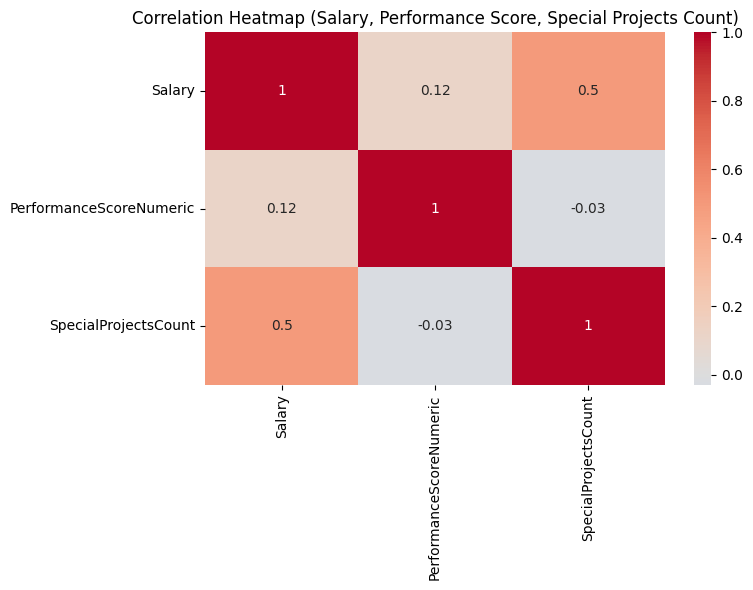

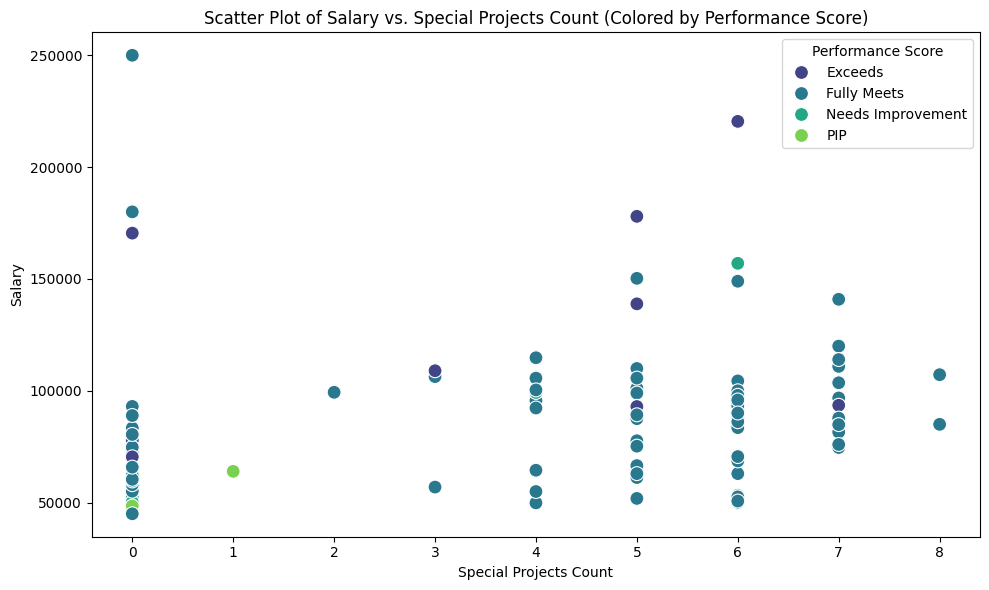


Descriptive Statistics for Salary, Performance and Special Projects
              Salary  PerformanceScoreNumeric  SpecialProjectsCount
count     280.000000               280.000000            280.000000
mean    69526.689286                 1.132143              1.292857
std     25640.184942                 0.339252              2.406671
min     45046.000000                 1.000000              0.000000
25%     55660.500000                 1.000000              0.000000
50%     63014.000000                 1.000000              0.000000
75%     72616.750000                 1.000000              0.000000
max    250000.000000                 2.000000              8.000000

Performance and Compensation analysis finished.


In [49]:
# --- Performance and Compensation Analysis ---

# 1. Basic Exploration: PerformanceScore vs. Salary

# Group by PerformanceScore and calculate the average salary for each group
performance_salary = hrd.groupby('PerformanceScore')['Salary'].mean().reset_index()

# Create a bar plot to visualize the average salary for each performance score
plt.figure(figsize=(10, 6))
sns.barplot(x='PerformanceScore', y='Salary', data=performance_salary, palette='viridis')
plt.title('Average Salary by Performance Score')
plt.xlabel('Performance Score')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# 2. Consideration of SpecialProjectsCount
# Visualize the relationship between Salary, Performance Score, and Special Project Count
plt.figure(figsize=(12, 8))
sns.boxplot(x='PerformanceScore', y='Salary', hue='SpecialProjectsCount', data=hrd, palette='Set2')
plt.title('Salary vs. Performance Score with Special Projects Count')
plt.xlabel('Performance Score')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# 3. Correlation analysis: 
# Filter out non-numeric values in 'PerformanceScore' to avoid errors during conversion
numeric_performance = hrd[hrd['PerformanceScore'].isin(['Exceeds', 'Fully Meets'])]
numeric_performance['PerformanceScoreNumeric'] = numeric_performance['PerformanceScore'].map({'Exceeds': 2, 'Fully Meets': 1})

#Correlation Matrix
correlation_matrix = numeric_performance[['Salary', 'PerformanceScoreNumeric', 'SpecialProjectsCount']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (Salary, Performance Score, Special Projects Count)')
plt.tight_layout()
plt.show()

# 4. Further Analysis: Scatter plots to look into the details.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SpecialProjectsCount', y='Salary', hue='PerformanceScore', data=hrd, palette='viridis', s=100)
plt.title('Scatter Plot of Salary vs. Special Projects Count (Colored by Performance Score)')
plt.xlabel('Special Projects Count')
plt.ylabel('Salary')
plt.legend(title='Performance Score')
plt.tight_layout()
plt.show()

# 5. Descriptive statistics
print("\nDescriptive Statistics for Salary, Performance and Special Projects")
print(numeric_performance[['Salary', 'PerformanceScoreNumeric', 'SpecialProjectsCount']].describe())

print("\nPerformance and Compensation analysis finished.")

II. Performance and Demographics
Task: Analyze if there's a relationship between PerformanceScore and demographic factors like Sex, RaceDesc, HispanicLatino, or Age (calculated from DOB). 
Be cautious about interpreting these results. Focus is on identifying the potential disparities, not making causal claims.

In [50]:
# --- Performance and Demographics Analysis ---

# 1. Calculate Age
# Calculate the difference in years between the current date and each employee's DOB
from datetime import datetime
today = datetime.today()
hrd['Age'] = (today - hrd['DOB']).dt.days // 365


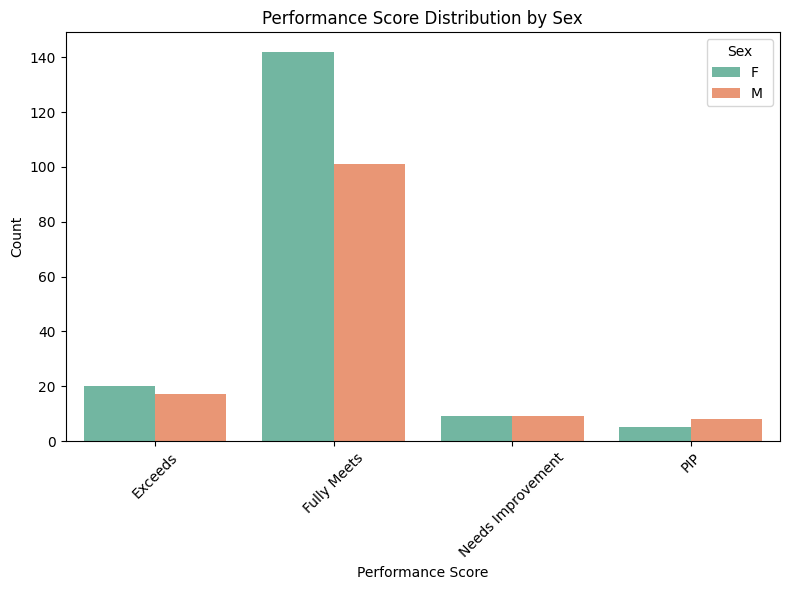

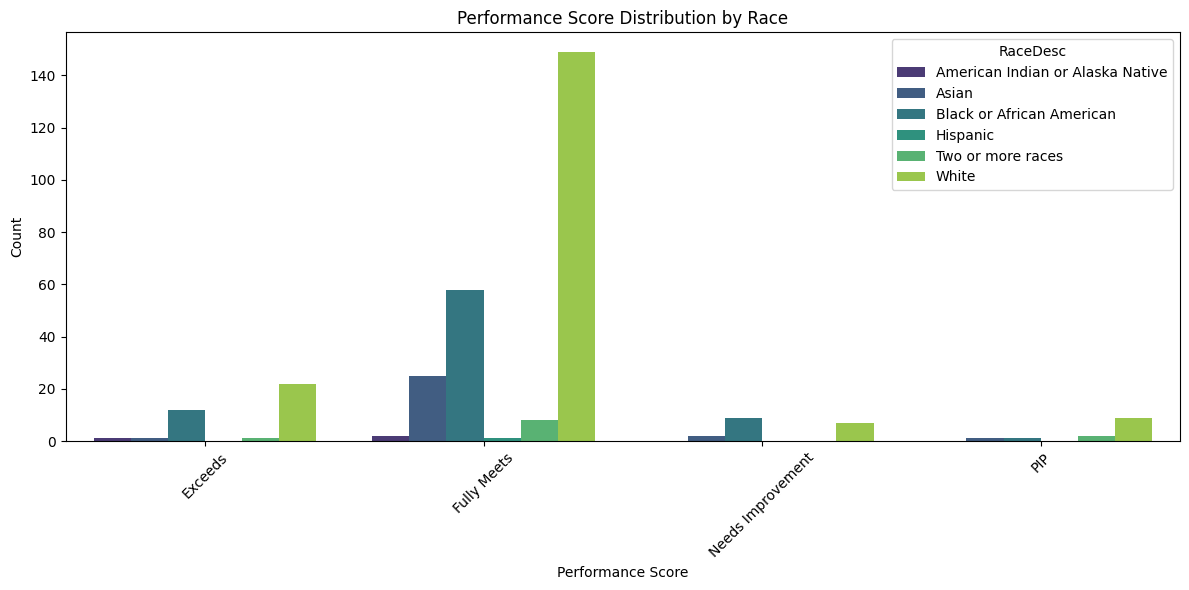

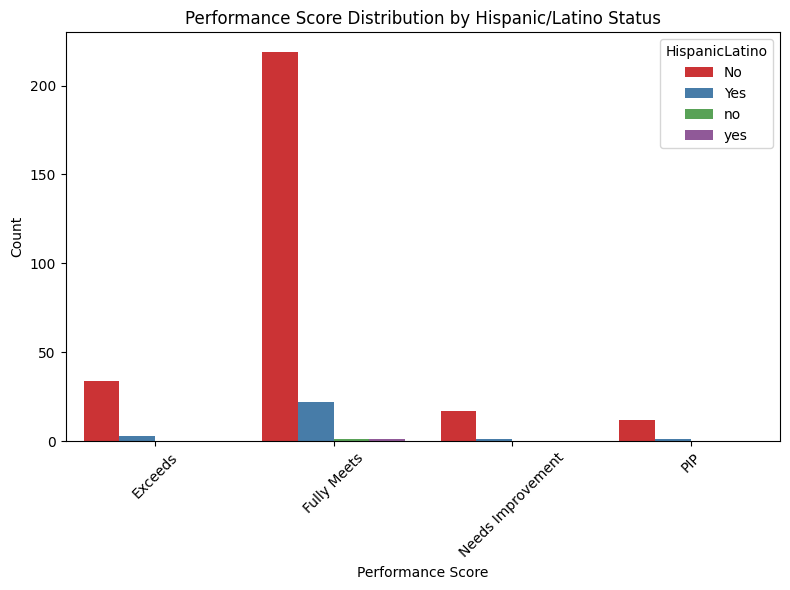

/tmp/ipykernel_106/161535170.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PerformanceScore', y='Age', data=hrd, palette='pastel')


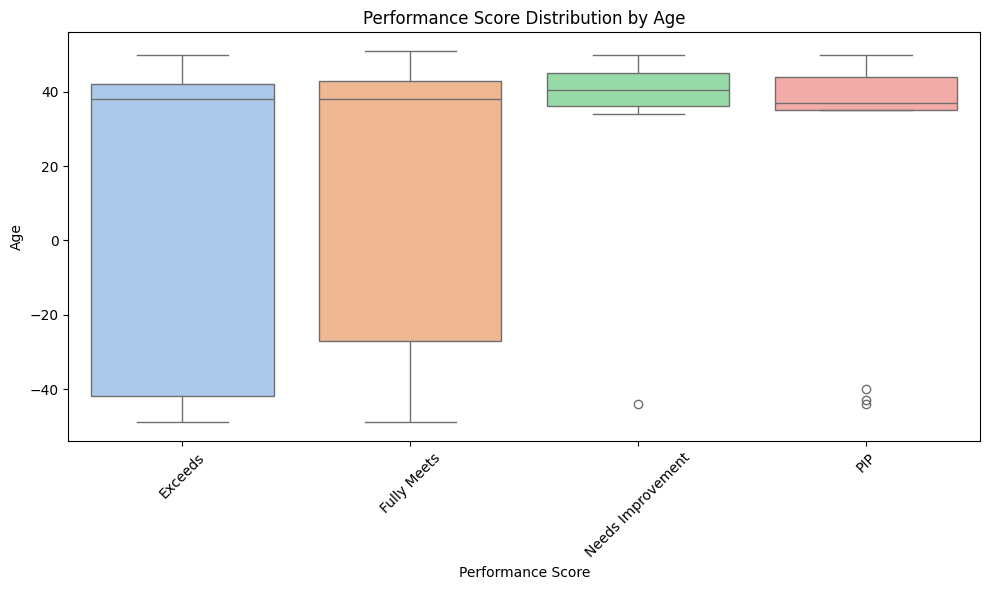


Descriptive statistics for Demographics vs. Performance
              Age
count  311.000000
mean    20.019293
std     36.767793
min    -49.000000
25%    -27.000000
50%     38.000000
75%     43.000000
max     51.000000

Performance and Demographics analysis finished.


In [51]:
# 2. Performance Score vs. Sex
plt.figure(figsize=(8, 6))
sns.countplot(x='PerformanceScore', hue='Sex', data=hrd, palette='Set2')
plt.title('Performance Score Distribution by Sex')
plt.xlabel('Performance Score')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

# 3. Performance Score vs. RaceDesc
plt.figure(figsize=(12, 6))
sns.countplot(x='PerformanceScore', hue='RaceDesc', data=hrd, palette='viridis')
plt.title('Performance Score Distribution by Race')
plt.xlabel('Performance Score')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='RaceDesc')
plt.tight_layout()
plt.show()

# 4. Performance Score vs. HispanicLatino
plt.figure(figsize=(8, 6))
sns.countplot(x='PerformanceScore', hue='HispanicLatino', data=hrd, palette='Set1')
plt.title('Performance Score Distribution by Hispanic/Latino Status')
plt.xlabel('Performance Score')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='HispanicLatino')
plt.tight_layout()
plt.show()

# 5. Performance Score vs. Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='PerformanceScore', y='Age', data=hrd, palette='pastel')
plt.title('Performance Score Distribution by Age')
plt.xlabel('Performance Score')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#6. Descriptive statistic
print("\nDescriptive statistics for Demographics vs. Performance")
print(hrd[['Age', 'PerformanceScore', 'Sex','RaceDesc','HispanicLatino']].describe())
print("\nPerformance and Demographics analysis finished.")

III. Absenteeism and Performance
Task: To examine the correlation between Absences and PerformanceScore. 
Question: Do employees with higher absences tend to perform worse? Consider also the interaction with DaysLateLast30.

/tmp/ipykernel_106/3957071133.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PerformanceScore', y='Absences', data=hrd, palette='Set3')


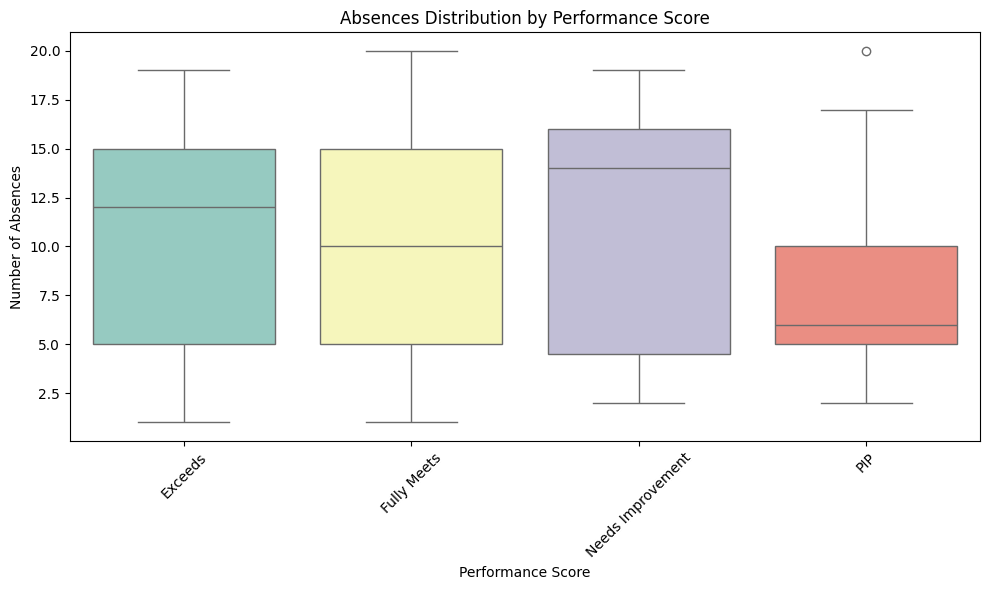

/tmp/ipykernel_106/3957071133.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Absences', y='PerformanceScore', data=hrd, palette='viridis')


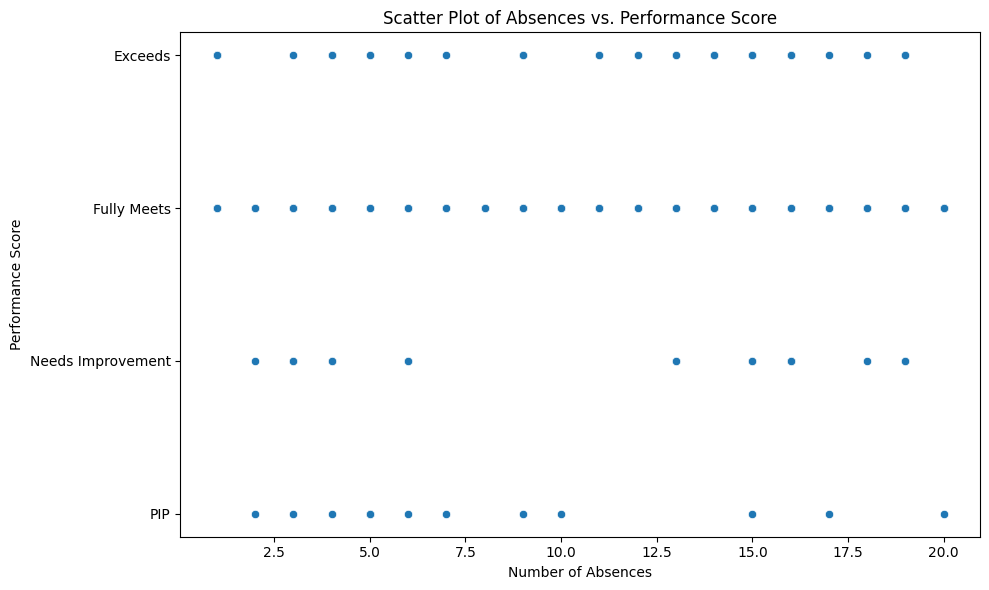

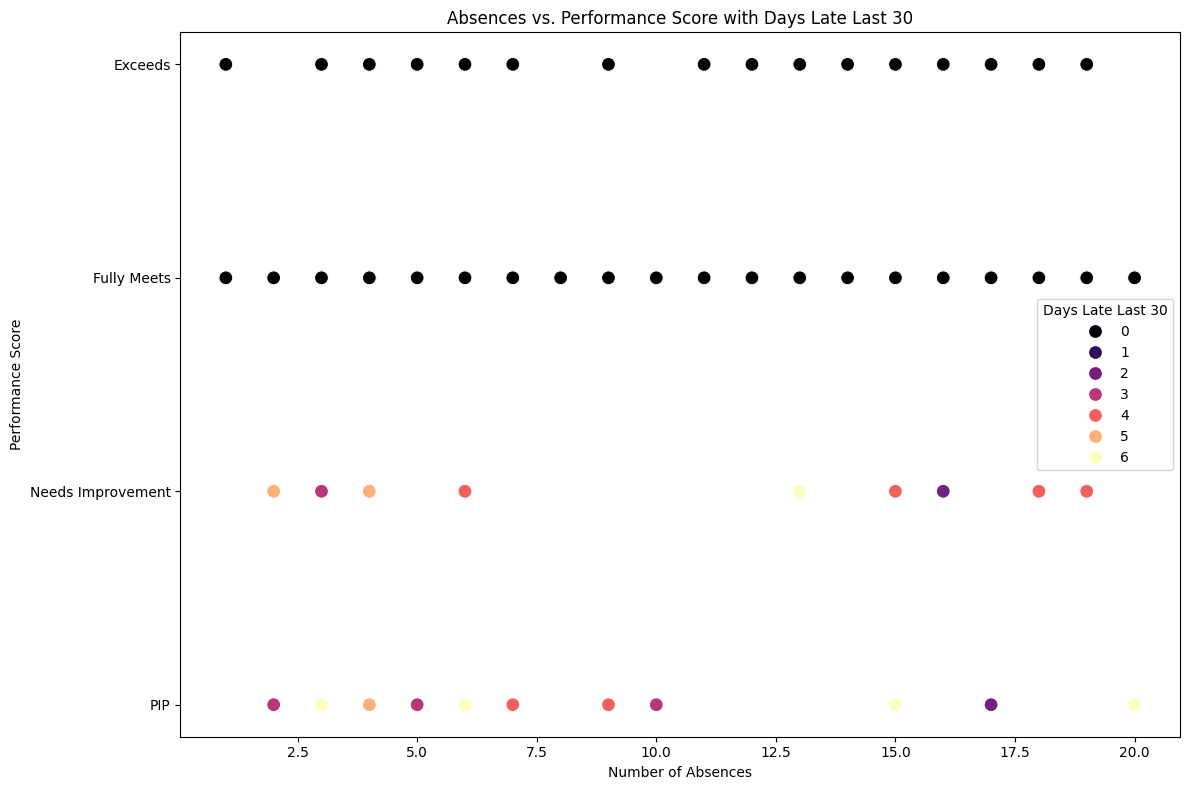

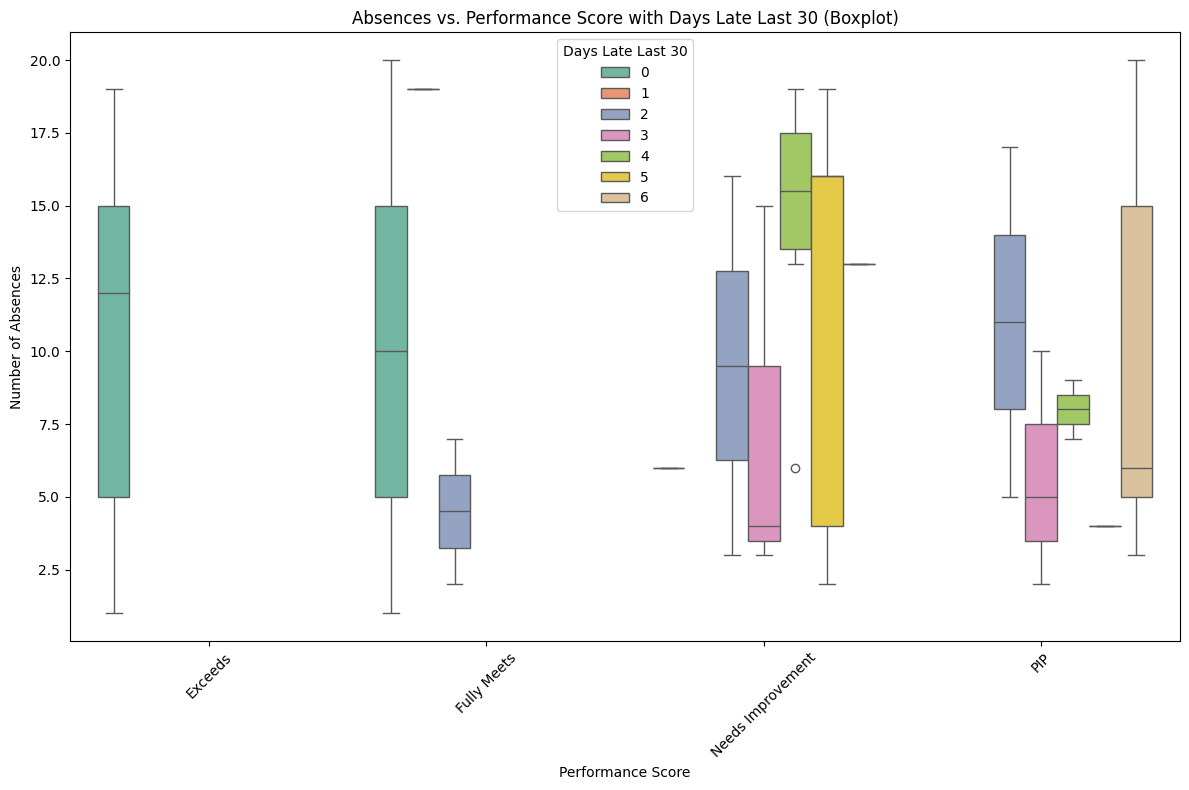

/tmp/ipykernel_106/3957071133.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_performance['PerformanceScoreNumeric'] = numeric_performance['PerformanceScore'].map({'Exceeds': 2, 'Fully Meets': 1})


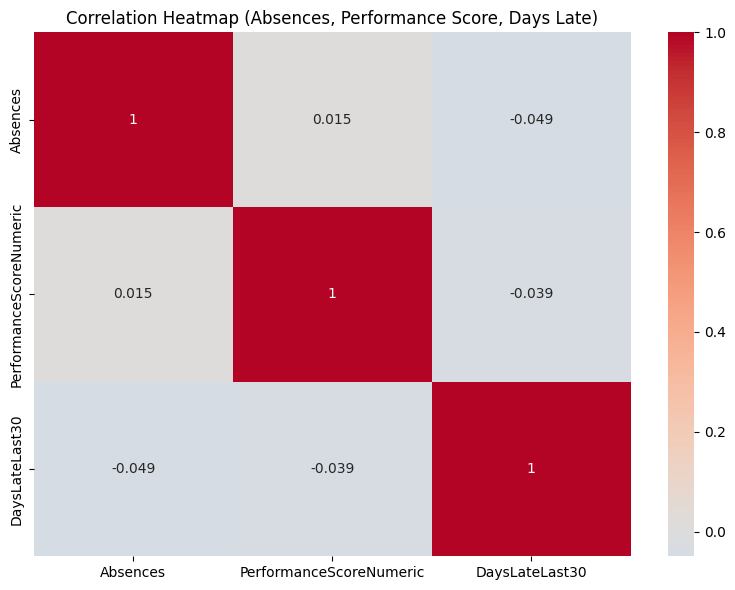


Descriptive statistics for Absences vs. Performance
         Absences  DaysLateLast30
count  311.000000      311.000000
mean    10.237942        0.414791
std      5.852596        1.294519
min      1.000000        0.000000
25%      5.000000        0.000000
50%     10.000000        0.000000
75%     15.000000        0.000000
max     20.000000        6.000000

Absenteeism and performance analysis finished.


In [52]:
# --- Absenteeism and Performance Analysis ---

# 1. Absences vs. Performance Score (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='PerformanceScore', y='Absences', data=hrd, palette='Set3')
plt.title('Absences Distribution by Performance Score')
plt.xlabel('Performance Score')
plt.ylabel('Number of Absences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Absences vs. Performance Score (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Absences', y='PerformanceScore', data=hrd, palette='viridis')
plt.title('Scatter Plot of Absences vs. Performance Score')
plt.xlabel('Number of Absences')
plt.ylabel('Performance Score')
plt.tight_layout()
plt.show()

# 3. Interaction with DaysLateLast30 (Scatter Plot with Hue)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Absences', y='PerformanceScore', hue='DaysLateLast30', data=hrd, palette='magma', s=100)
plt.title('Absences vs. Performance Score with Days Late Last 30')
plt.xlabel('Number of Absences')
plt.ylabel('Performance Score')
plt.legend(title='Days Late Last 30')
plt.tight_layout()
plt.show()

# 4. Absences vs. Performance Score and DaysLateLast30 (Box Plot)
plt.figure(figsize=(12, 8))
sns.boxplot(x='PerformanceScore', y='Absences', hue='DaysLateLast30', data=hrd, palette='Set2')
plt.title('Absences vs. Performance Score with Days Late Last 30 (Boxplot)')
plt.xlabel('Performance Score')
plt.ylabel('Number of Absences')
plt.legend(title='Days Late Last 30')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#5. Correlation analysis
numeric_performance = hrd[hrd['PerformanceScore'].isin(['Exceeds', 'Fully Meets'])]
numeric_performance['PerformanceScoreNumeric'] = numeric_performance['PerformanceScore'].map({'Exceeds': 2, 'Fully Meets': 1})
correlation_matrix = numeric_performance[['Absences', 'PerformanceScoreNumeric', 'DaysLateLast30']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (Absences, Performance Score, Days Late)')
plt.tight_layout()
plt.show()

# 6. Descriptive statistic
print("\nDescriptive statistics for Absences vs. Performance")
print(hrd[['Absences', 'PerformanceScore', 'DaysLateLast30']].describe())
print("\nAbsenteeism and performance analysis finished.")

IV. Departmental Performance
Task: To compare the average PerformanceScore across different Departments. 
Question: Are certain departments consistently outperforming others?

/tmp/ipykernel_106/134429065.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  department_performance = hrd.groupby('Department')['PerformanceScoreNumeric'].mean().reset_index()
/tmp/ipykernel_106/134429065.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='PerformanceScoreNumeric', data=department_performance, palette='coolwarm')


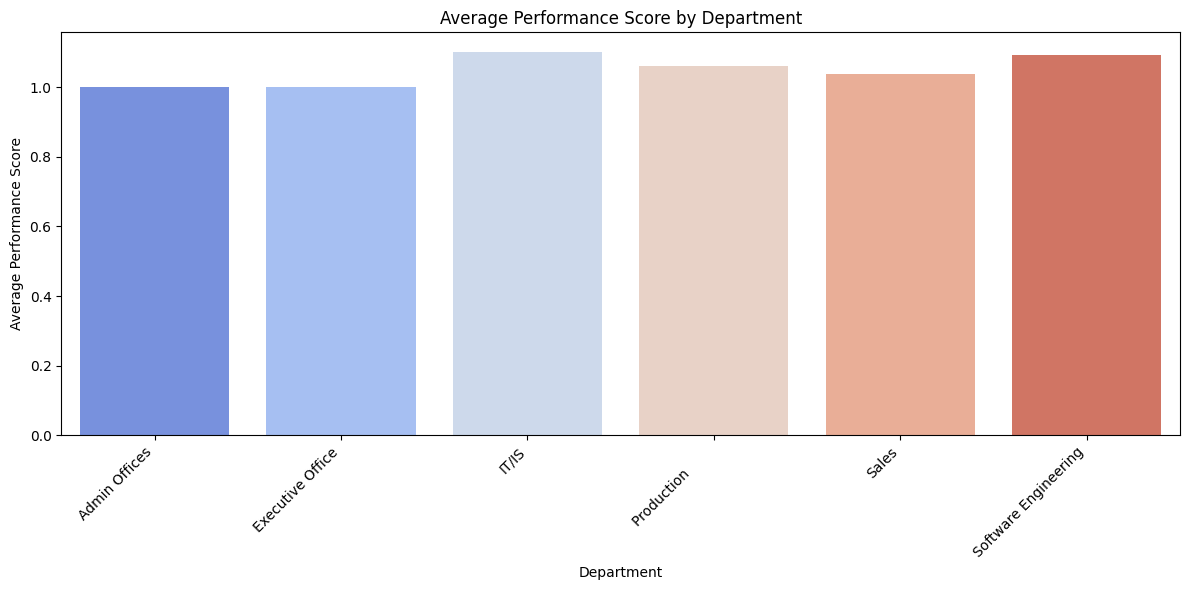

/tmp/ipykernel_106/134429065.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Department', y='PerformanceScoreNumeric', data=hrd, palette='Set2')


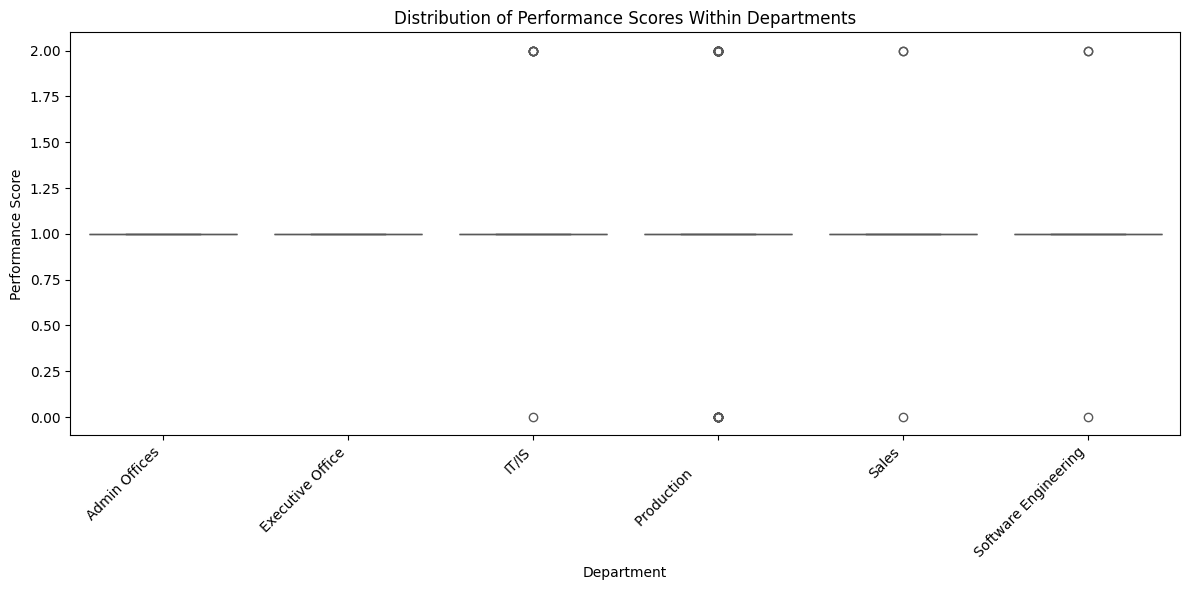

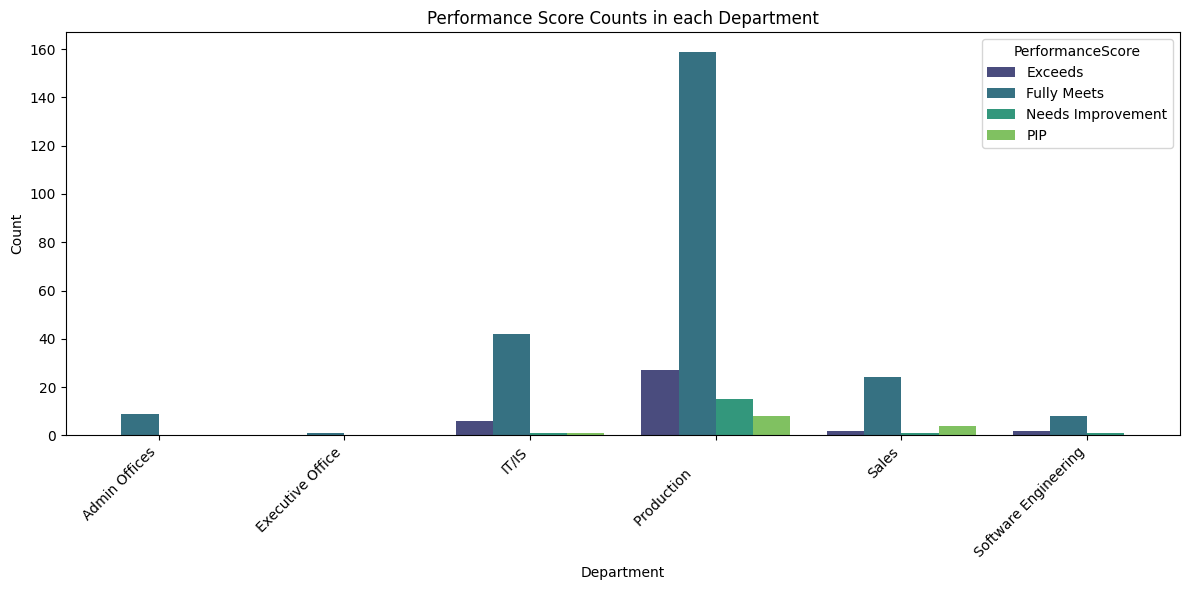


Descriptive statistics for performance by department
                      count      mean       std  min  25%  50%  75%  max
Department                                                              
Admin Offices           9.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
Executive Office        1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0
IT/IS                  49.0  1.102041  0.367701  0.0  1.0  1.0  1.0  2.0
Production            201.0  1.059701  0.454332  0.0  1.0  1.0  1.0  2.0
Sales                  27.0  1.037037  0.337580  0.0  1.0  1.0  1.0  2.0
Software Engineering   11.0  1.090909  0.539360  0.0  1.0  1.0  1.0  2.0

Departmental performance analysis finished.


/tmp/ipykernel_106/134429065.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(hrd.groupby('Department')['PerformanceScoreNumeric'].describe())


In [53]:
# --- Departmental Performance Analysis ---

# 1. Convert PerformanceScore to numerical representation
hrd['PerformanceScoreNumeric'] = hrd['PerformanceScore'].map({'Exceeds': 2, 'Fully Meets': 1, 'Needs Improvement':0})

# 2. Calculate Average Performance Score per Department
department_performance = hrd.groupby('Department')['PerformanceScoreNumeric'].mean().reset_index()

# 3. Sort Department performance
department_performance = department_performance.sort_values(by='PerformanceScoreNumeric', ascending=False)

# 4. Visualize Average Performance Score by Department (Bar Plot)
plt.figure(figsize=(12, 6))
sns.barplot(x='Department', y='PerformanceScoreNumeric', data=department_performance, palette='coolwarm')
plt.title('Average Performance Score by Department')
plt.xlabel('Department')
plt.ylabel('Average Performance Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

# 5. Distribution of Performance Scores Within Departments (Box Plot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='PerformanceScoreNumeric', data=hrd, palette='Set2')
plt.title('Distribution of Performance Scores Within Departments')
plt.xlabel('Department')
plt.ylabel('Performance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6. Count of performance scores within each department (Countplot)
plt.figure(figsize=(12, 6))
sns.countplot(x='Department', hue='PerformanceScore', data=hrd, palette='viridis')
plt.title('Performance Score Counts in each Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# 7. Descriptive Statistics for performance by department
print("\nDescriptive statistics for performance by department")
print(hrd.groupby('Department')['PerformanceScoreNumeric'].describe())
print("\nDepartmental performance analysis finished.")

V. Recruitment Source and Performance
Task: To analyze if the RecruitmentSource has an impact on PerformanceScore or employee retention (Termd).

/tmp/ipykernel_106/2078248952.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recruitment_performance = hrd.groupby('RecruitmentSource')['PerformanceScoreNumeric'].mean().reset_index()
/tmp/ipykernel_106/2078248952.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RecruitmentSource', y='PerformanceScoreNumeric', data=recruitment_performance, palette='viridis')


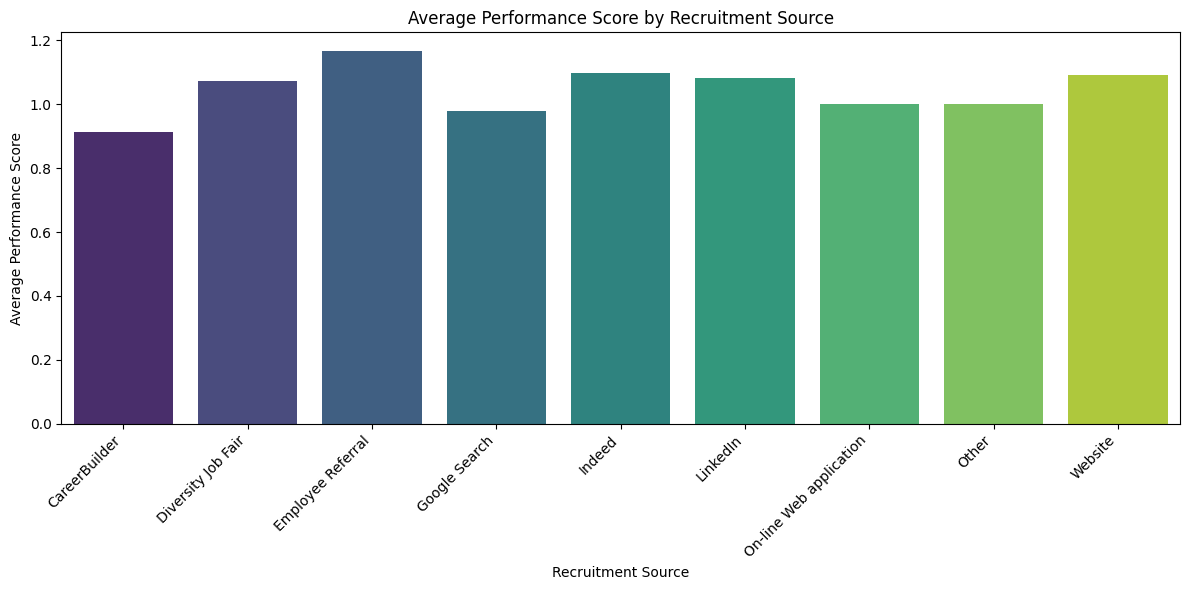

/tmp/ipykernel_106/2078248952.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RecruitmentSource', y='PerformanceScoreNumeric', data=hrd, palette='Set2')


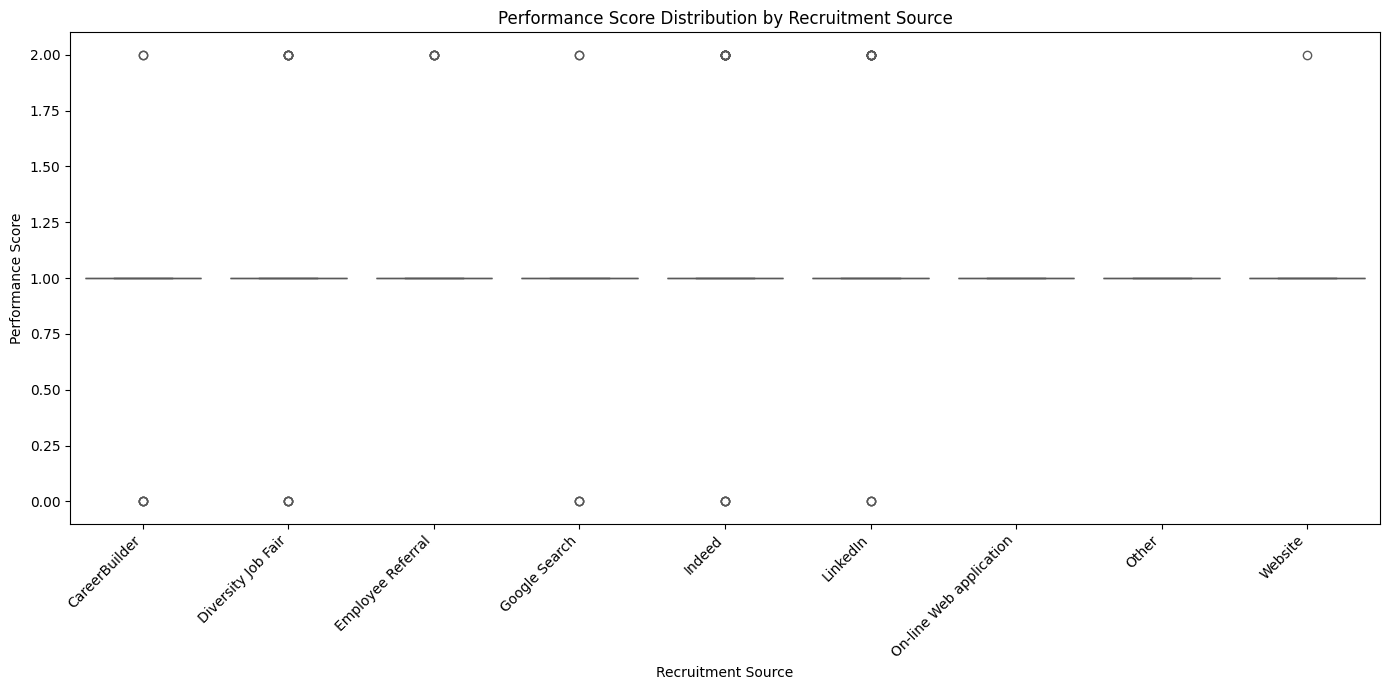

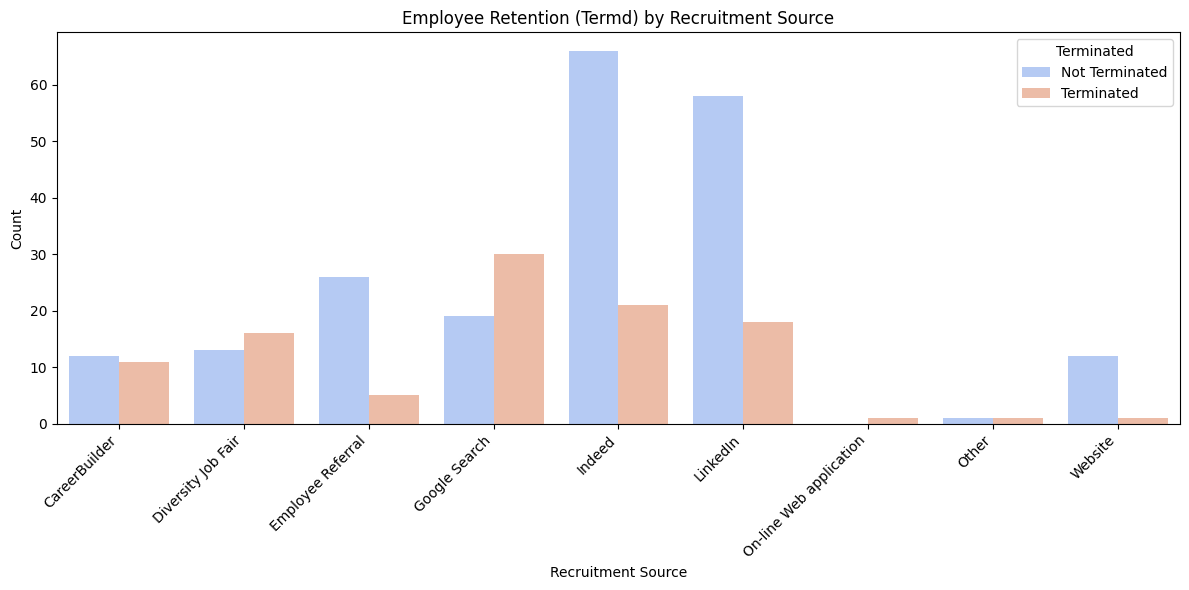

/tmp/ipykernel_106/2078248952.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retention_by_source = hrd.groupby('RecruitmentSource')['Termd'].value_counts(normalize=True).unstack()


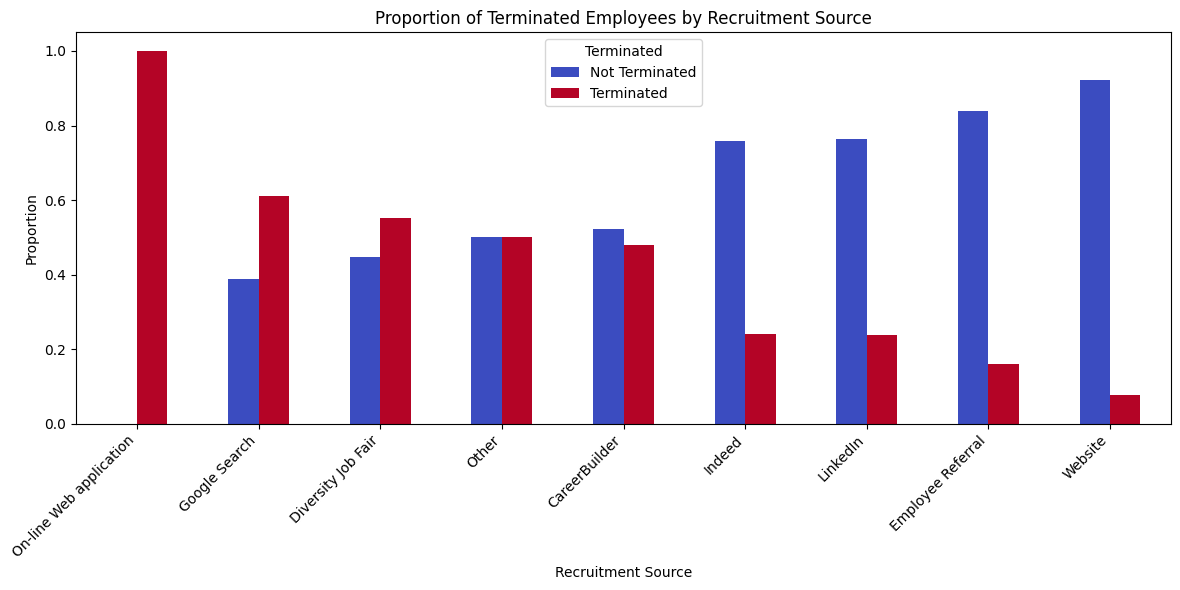


Descriptive statistics for Performance by Recruitment Source
                         count      mean       std  min  25%  50%  75%  max
RecruitmentSource                                                          
CareerBuilder             23.0  0.913043  0.514609  0.0  1.0  1.0  1.0  2.0
Diversity Job Fair        28.0  1.071429  0.604218  0.0  1.0  1.0  1.0  2.0
Employee Referral         30.0  1.166667  0.379049  1.0  1.0  1.0  1.0  2.0
Google Search             48.0  0.979167  0.325484  0.0  1.0  1.0  1.0  2.0
Indeed                    82.0  1.097561  0.433469  0.0  1.0  1.0  1.0  2.0
LinkedIn                  73.0  1.082192  0.399772  0.0  1.0  1.0  1.0  2.0
On-line Web application    1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0
Other                      2.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
Website                   11.0  1.090909  0.301511  1.0  1.0  1.0  1.0  2.0

Descriptive statistics for Termd by Recruitment Source
RecruitmentSource        Termd
CareerBuilder  

/tmp/ipykernel_106/2078248952.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(hrd.groupby('RecruitmentSource')['PerformanceScoreNumeric'].describe())
/tmp/ipykernel_106/2078248952.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(hrd.groupby('RecruitmentSource')['Termd'].value_counts())


In [54]:
# --- Recruitment Source and Performance Analysis ---

# 1. Convert PerformanceScore to a numerical representation
hrd['PerformanceScoreNumeric'] = hrd['PerformanceScore'].map({'Exceeds': 2, 'Fully Meets': 1,'Needs Improvement':0})

# 2. Average Performance Score by Recruitment Source (Bar Plot)
recruitment_performance = hrd.groupby('RecruitmentSource')['PerformanceScoreNumeric'].mean().reset_index()
recruitment_performance = recruitment_performance.sort_values(by='PerformanceScoreNumeric', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='RecruitmentSource', y='PerformanceScoreNumeric', data=recruitment_performance, palette='viridis')
plt.title('Average Performance Score by Recruitment Source')
plt.xlabel('Recruitment Source')
plt.ylabel('Average Performance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Performance Score Distribution by Recruitment Source (Box Plot)
plt.figure(figsize=(14, 7))
sns.boxplot(x='RecruitmentSource', y='PerformanceScoreNumeric', data=hrd, palette='Set2')
plt.title('Performance Score Distribution by Recruitment Source')
plt.xlabel('Recruitment Source')
plt.ylabel('Performance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Employee Retention (Termd) by Recruitment Source (Count Plot)
plt.figure(figsize=(12, 6))
sns.countplot(x='RecruitmentSource', hue='Termd', data=hrd, palette='coolwarm')
plt.title('Employee Retention (Termd) by Recruitment Source')
plt.xlabel('Recruitment Source')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Terminated', labels=['Not Terminated', 'Terminated'])
plt.tight_layout()
plt.show()

# 5.  Proportion of Terminated Employees by Recruitment Source (Bar plot)
retention_by_source = hrd.groupby('RecruitmentSource')['Termd'].value_counts(normalize=True).unstack()
retention_by_source = retention_by_source.sort_values(by=True, ascending=False)
retention_by_source.plot(kind='bar', stacked=False, figsize=(12, 6), colormap='coolwarm')
plt.title('Proportion of Terminated Employees by Recruitment Source')
plt.xlabel('Recruitment Source')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Terminated', labels=['Not Terminated', 'Terminated'])
plt.tight_layout()
plt.show()
# 6. Descriptive Statistics for Performance and Termd by Recruitment Source
print("\nDescriptive statistics for Performance by Recruitment Source")
print(hrd.groupby('RecruitmentSource')['PerformanceScoreNumeric'].describe())
print("\nDescriptive statistics for Termd by Recruitment Source")
print(hrd.groupby('RecruitmentSource')['Termd'].value_counts())

print("\nRecruitment source and performance analysis finished.")

VI. Tenure and Performance
Task: To explore if employee tenure (time in the company, calculated from Date ofHire) correlates with PerformanceScore or EmpSatisfaction.

/tmp/ipykernel_106/1392103402.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Tenure', y='PerformanceScoreNumeric', data=hrd, palette='viridis')


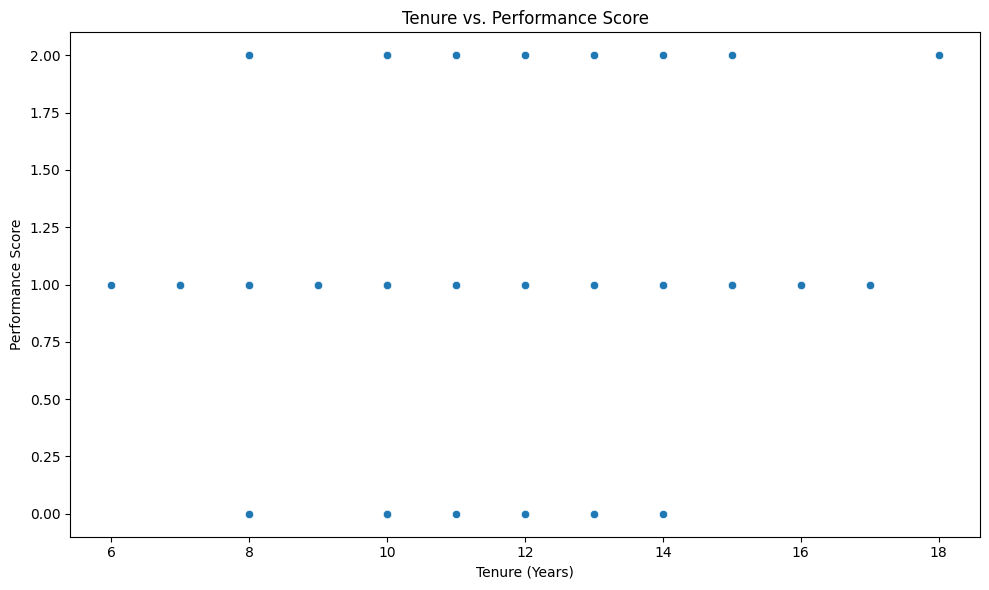

/tmp/ipykernel_106/1392103402.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Tenure', y='EmpSatisfaction', data=hrd, palette='magma')


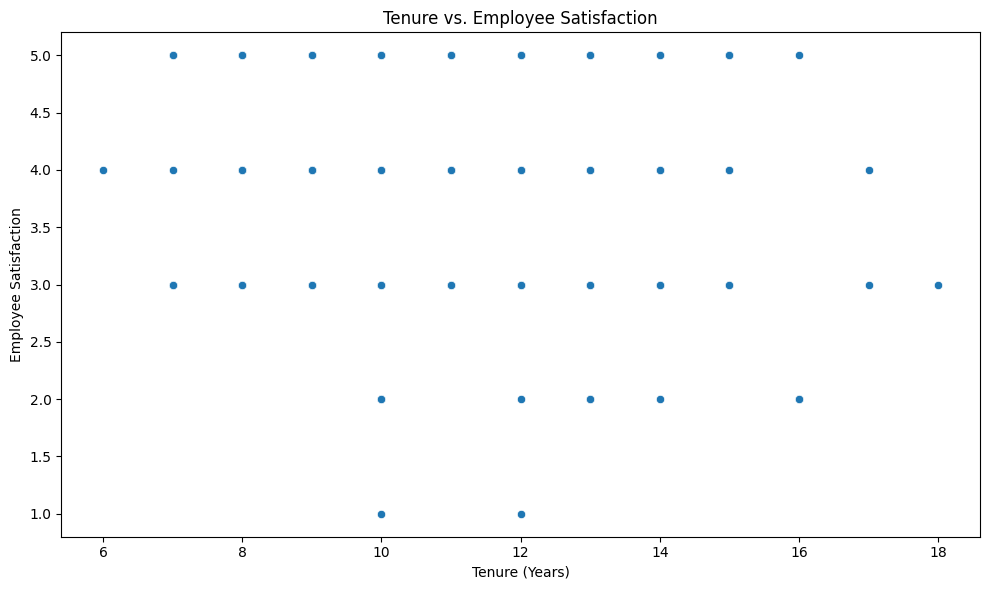

/tmp/ipykernel_106/1392103402.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PerformanceScore', y='Tenure', data=hrd, palette='Set3')


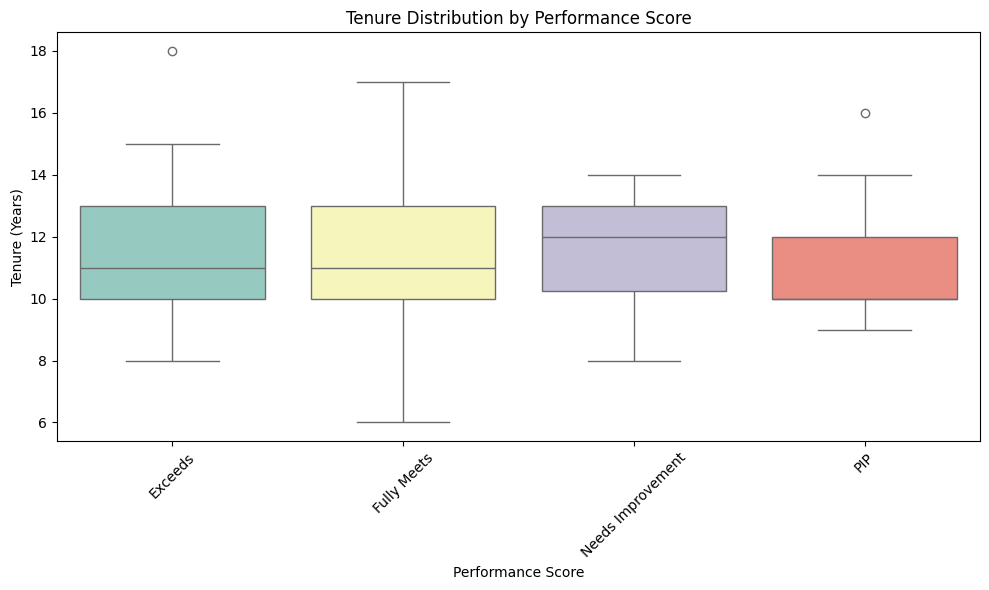

/tmp/ipykernel_106/1392103402.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EmpSatisfaction', y='Tenure', data=hrd, palette='Set2')


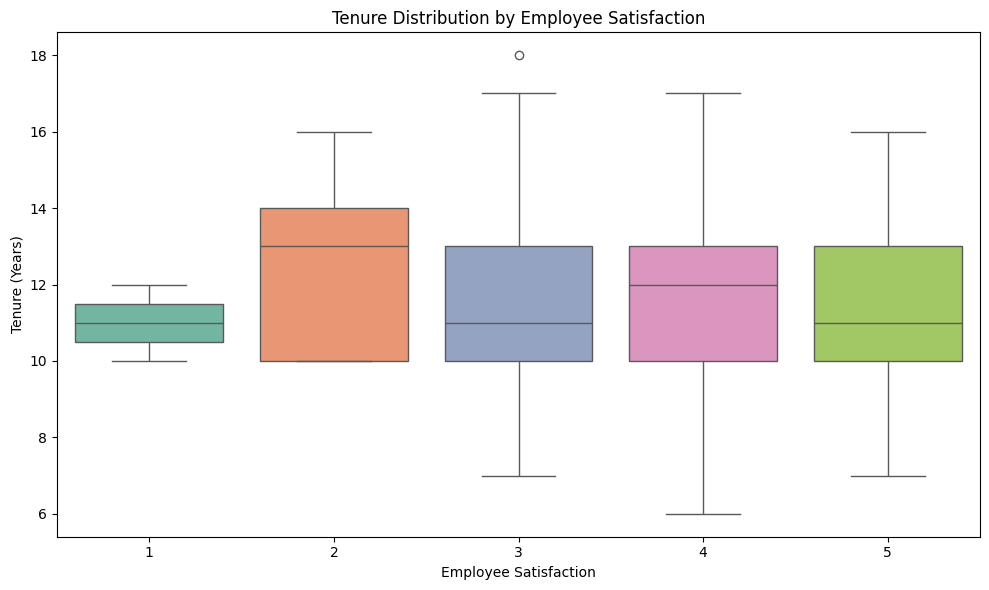

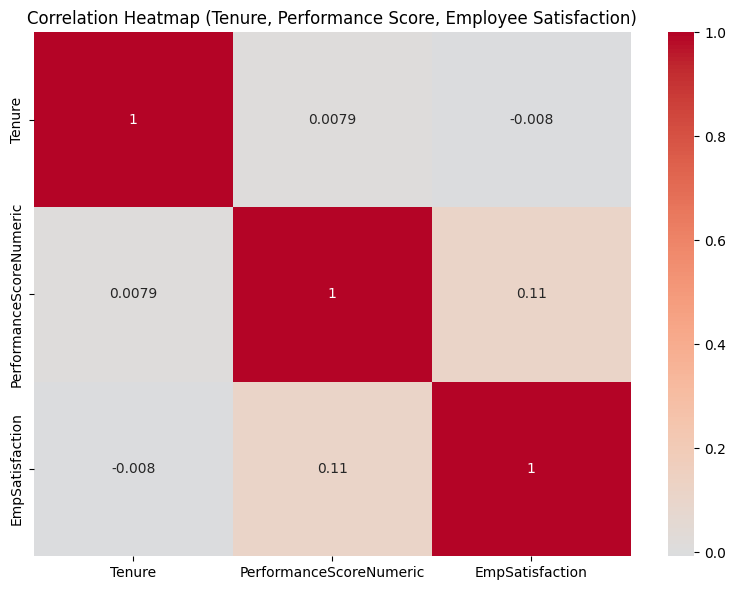


Descriptive statistics for Tenure vs. Performance
           Tenure  PerformanceScoreNumeric  EmpSatisfaction
count  311.000000               298.000000       311.000000
mean    11.311897                 1.063758         3.890675
std      1.956582                 0.425566         0.909241
min      6.000000                 0.000000         1.000000
25%     10.000000                 1.000000         3.000000
50%     11.000000                 1.000000         4.000000
75%     13.000000                 1.000000         5.000000
max     18.000000                 2.000000         5.000000

Tenure and performance analysis finished.


In [55]:
# --- Tenure and Performance/Satisfaction Analysis ---

# 1. Calculate Tenure
from datetime import datetime
today = datetime.today()
hrd['Tenure'] = (today - hrd['DateofHire']).dt.days // 365  # Tenure in years

# 2. Convert PerformanceScore to numerical
hrd['PerformanceScoreNumeric'] = hrd['PerformanceScore'].map({'Exceeds': 2, 'Fully Meets': 1, 'Needs Improvement':0})

# 3. Tenure vs. Performance Score (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tenure', y='PerformanceScoreNumeric', data=hrd, palette='viridis')
plt.title('Tenure vs. Performance Score')
plt.xlabel('Tenure (Years)')
plt.ylabel('Performance Score')
plt.tight_layout()
plt.show()

# 4. Tenure vs. Employee Satisfaction (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tenure', y='EmpSatisfaction', data=hrd, palette='magma')
plt.title('Tenure vs. Employee Satisfaction')
plt.xlabel('Tenure (Years)')
plt.ylabel('Employee Satisfaction')
plt.tight_layout()
plt.show()

# 5. Tenure vs. Performance Score (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='PerformanceScore', y='Tenure', data=hrd, palette='Set3')
plt.title('Tenure Distribution by Performance Score')
plt.xlabel('Performance Score')
plt.ylabel('Tenure (Years)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Tenure vs. Employee Satisfaction (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='EmpSatisfaction', y='Tenure', data=hrd, palette='Set2')
plt.title('Tenure Distribution by Employee Satisfaction')
plt.xlabel('Employee Satisfaction')
plt.ylabel('Tenure (Years)')
plt.tight_layout()
plt.show()

# 7. Correlation Analysis
correlation_matrix = hrd[['Tenure', 'PerformanceScoreNumeric', 'EmpSatisfaction']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (Tenure, Performance Score, Employee Satisfaction)')
plt.tight_layout()
plt.show()

#8 Descriptive Statistics
print("\nDescriptive statistics for Tenure vs. Performance")
print(hrd[['Tenure', 'PerformanceScoreNumeric', 'EmpSatisfaction']].describe())
print("\nTenure and performance analysis finished.")

VII. Marital Status and Performance
Task: To investigate if MaritalStatusID or MaritalDesc is related to PerformanceScore or Absences.

/tmp/ipykernel_106/2952856289.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MaritalDesc', y='PerformanceScoreNumeric', data=hrd, palette='Set3')


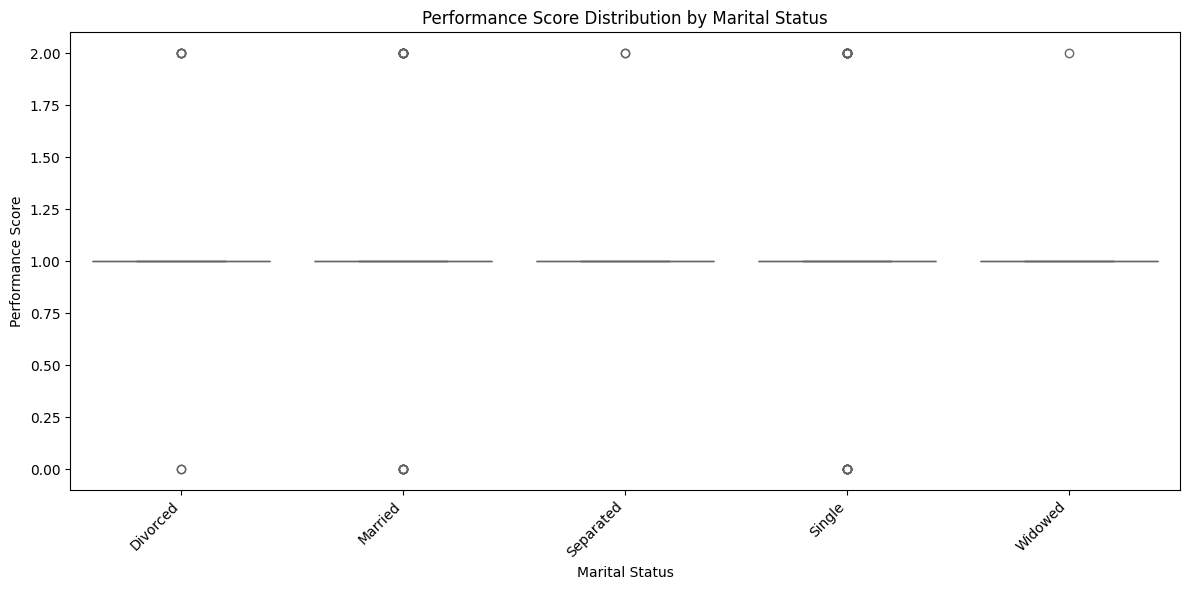

/tmp/ipykernel_106/2952856289.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MaritalDesc', y='Absences', data=hrd, palette='viridis')


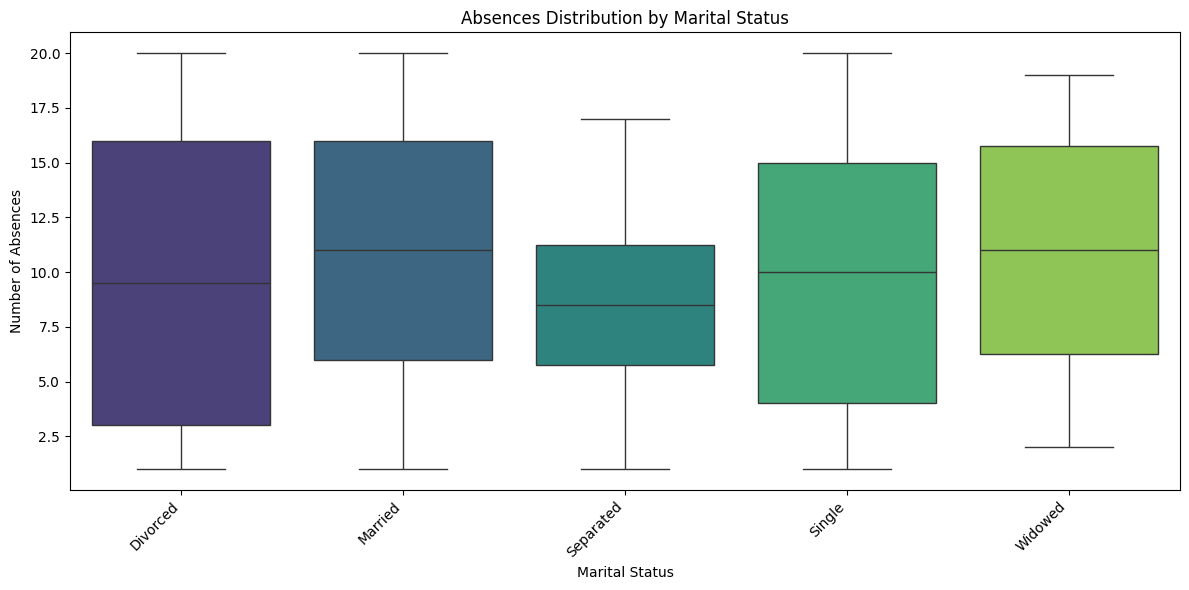

/tmp/ipykernel_106/2952856289.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MaritalStatusID', y='PerformanceScoreNumeric', data=hrd, palette='Set2')


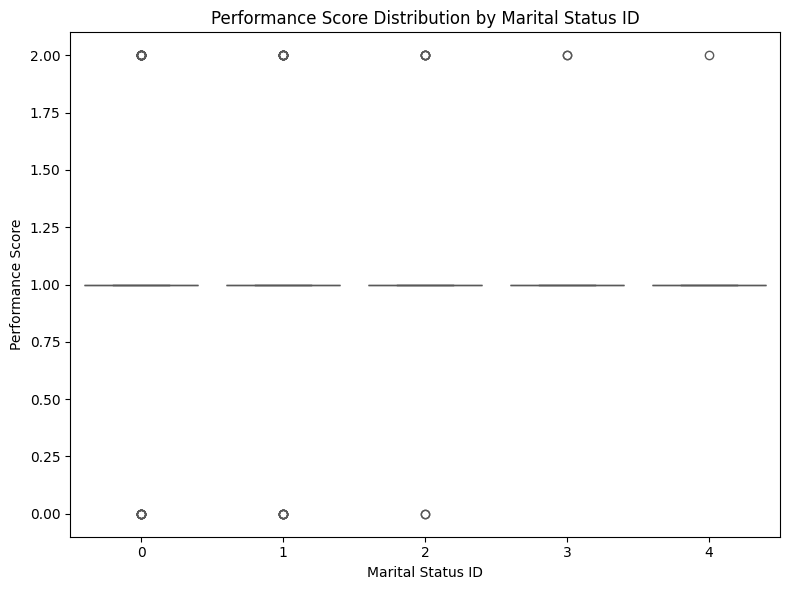

/tmp/ipykernel_106/2952856289.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MaritalStatusID', y='Absences', data=hrd, palette='magma')


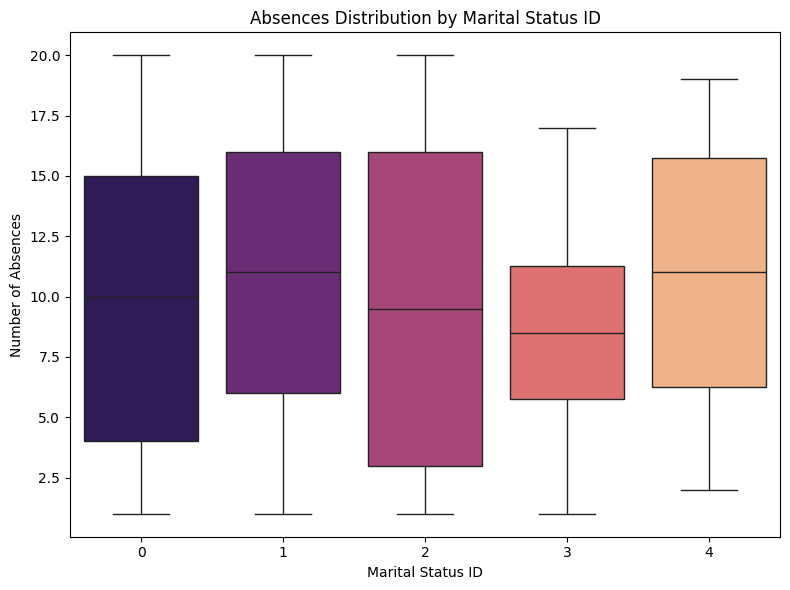


Descriptive Statistics for Marital Status vs. Performance
             count      mean       std  min  25%  50%  75%  max
MaritalDesc                                                    
Divorced      30.0  1.100000  0.480660  0.0  1.0  1.0  1.0  2.0
Married      118.0  1.033898  0.390752  0.0  1.0  1.0  1.0  2.0
Separated     11.0  1.181818  0.404520  1.0  1.0  1.0  1.0  2.0
Single       131.0  1.068702  0.450484  0.0  1.0  1.0  1.0  2.0
Widowed        8.0  1.125000  0.353553  1.0  1.0  1.0  1.0  2.0

Descriptive Statistics for Marital Status vs. Absences
             count       mean       std  min   25%   50%    75%   max
MaritalDesc                                                          
Divorced      30.0  10.000000  6.586297  1.0  3.00   9.5  16.00  20.0
Married      124.0  10.927419  5.554129  1.0  6.00  11.0  16.00  20.0
Separated     12.0   8.583333  5.142662  1.0  5.75   8.5  11.25  17.0
Single       137.0   9.773723  5.966811  1.0  4.00  10.0  15.00  20.0
Widowed        8.

/tmp/ipykernel_106/2952856289.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(hrd.groupby('MaritalDesc')['PerformanceScoreNumeric'].describe())
/tmp/ipykernel_106/2952856289.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(hrd.groupby('MaritalDesc')['Absences'].describe())


In [56]:
# --- Marital Status and Performance/Absences Analysis ---

# 1. Convert PerformanceScore to Numerical
hrd['PerformanceScoreNumeric'] = hrd['PerformanceScore'].map({'Exceeds': 2, 'Fully Meets': 1, 'Needs Improvement':0})

# 2. Marital Description vs. Performance Score (Box Plot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='MaritalDesc', y='PerformanceScoreNumeric', data=hrd, palette='Set3')
plt.title('Performance Score Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Performance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Marital Description vs. Absences (Box Plot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='MaritalDesc', y='Absences', data=hrd, palette='viridis')
plt.title('Absences Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Absences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Marital Status ID vs. Performance Score (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='MaritalStatusID', y='PerformanceScoreNumeric', data=hrd, palette='Set2')
plt.title('Performance Score Distribution by Marital Status ID')
plt.xlabel('Marital Status ID')
plt.ylabel('Performance Score')
plt.tight_layout()
plt.show()

# 5. Marital Status ID vs. Absences (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='MaritalStatusID', y='Absences', data=hrd, palette='magma')
plt.title('Absences Distribution by Marital Status ID')
plt.xlabel('Marital Status ID')
plt.ylabel('Number of Absences')
plt.tight_layout()
plt.show()
# 6. Descriptive Statistics
print("\nDescriptive Statistics for Marital Status vs. Performance")
print(hrd.groupby('MaritalDesc')['PerformanceScoreNumeric'].describe())
print("\nDescriptive Statistics for Marital Status vs. Absences")
print(hrd.groupby('MaritalDesc')['Absences'].describe())

print("\nMarital status and performance analysis finished.")

VIII. Manager Impact
Task: To analyze if employees under certain managers (ManagerName or ManagerID) exhibit different performance patterns.

/tmp/ipykernel_106/2151728510.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  manager_performance = hrd.groupby('ManagerName')['PerformanceScoreNumeric'].mean().reset_index()
/tmp/ipykernel_106/2151728510.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ManagerName', y='PerformanceScoreNumeric', data=manager_performance, palette='viridis')


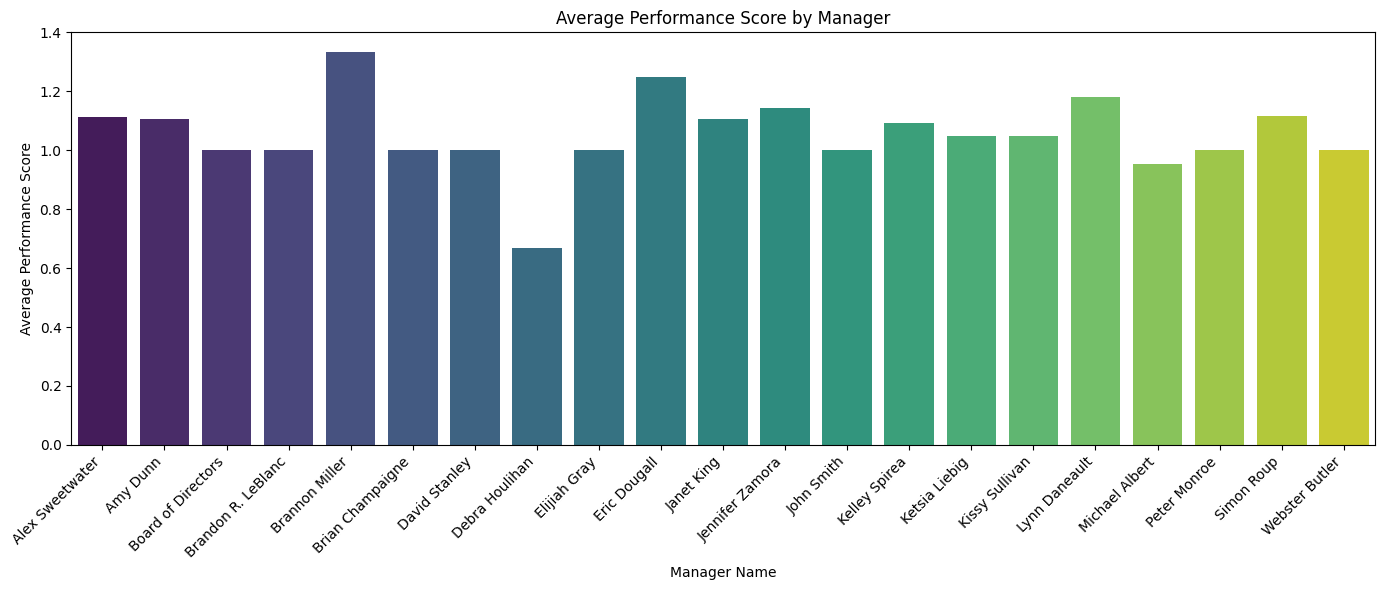

/tmp/ipykernel_106/2151728510.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ManagerName', y='PerformanceScoreNumeric', data=hrd, palette='Set2')


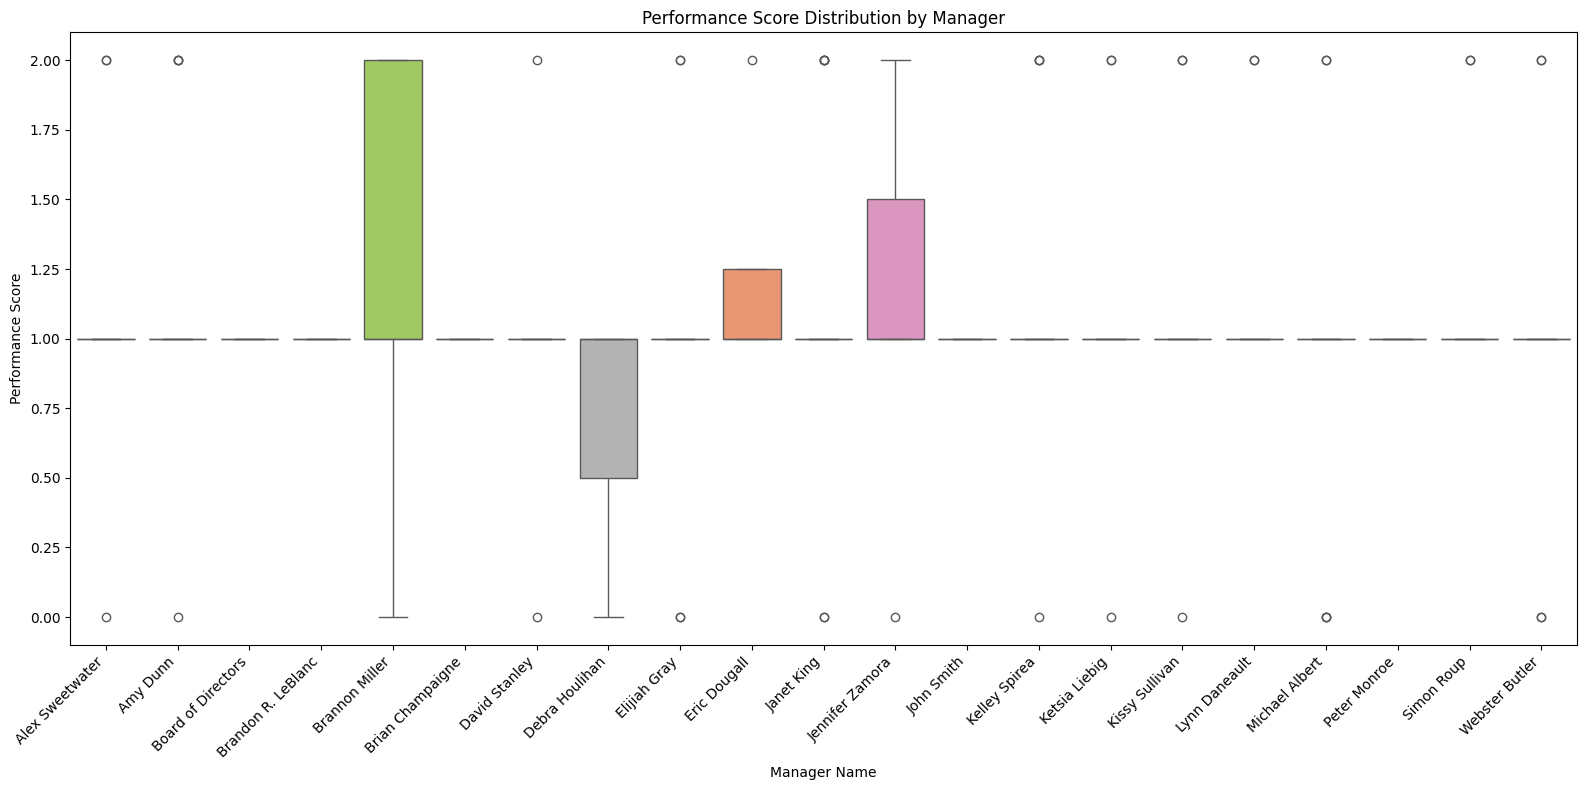

/tmp/ipykernel_106/2151728510.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ManagerID', y='PerformanceScoreNumeric', data=hrd, palette='coolwarm')


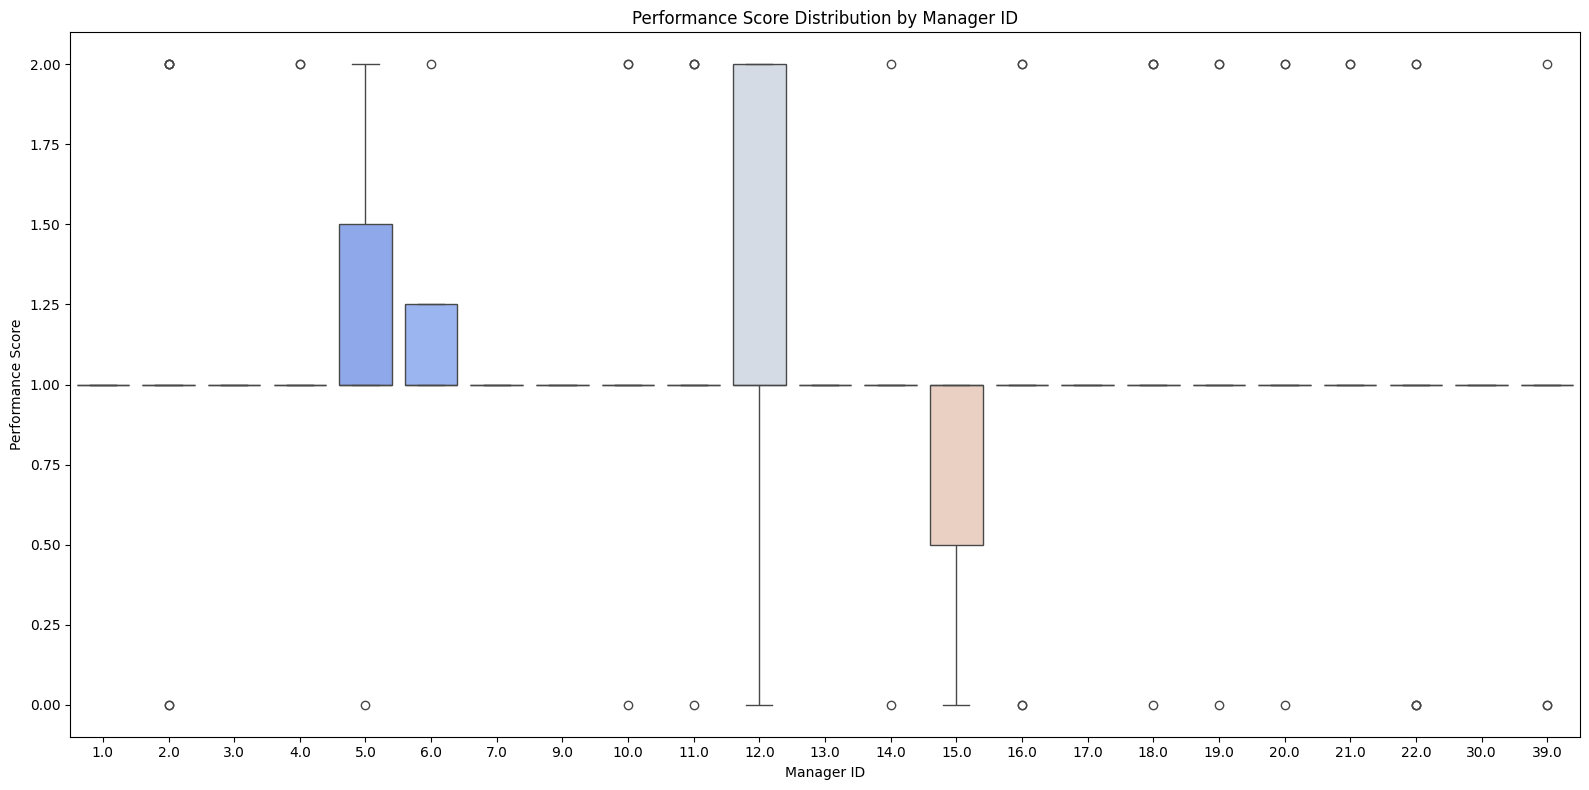

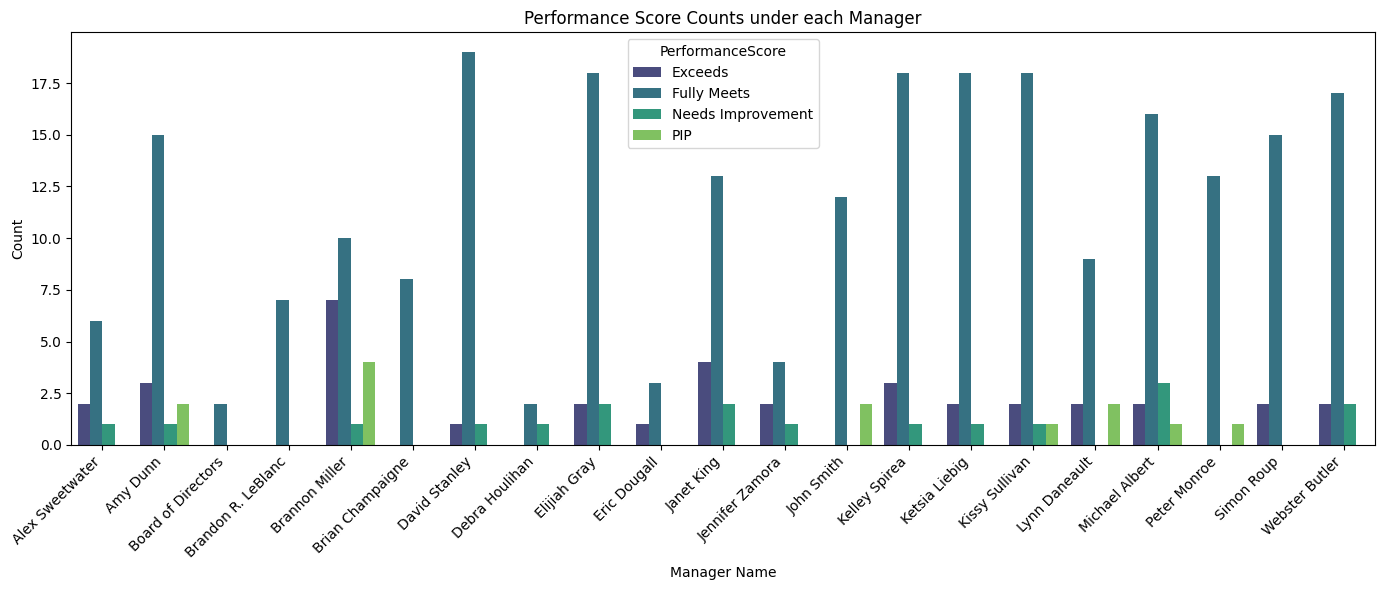


Descriptive statistics for Performance by Manager
                    count      mean       std  min  25%  50%   75%  max
ManagerName                                                            
Alex Sweetwater       9.0  1.111111  0.600925  0.0  1.0  1.0  1.00  2.0
Amy Dunn             19.0  1.105263  0.458831  0.0  1.0  1.0  1.00  2.0
Board of Directors    2.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0
Brandon R. LeBlanc    7.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0
Brannon Miller       18.0  1.333333  0.594089  0.0  1.0  1.0  2.00  2.0
Brian Champaigne      8.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0
David Stanley        21.0  1.000000  0.316228  0.0  1.0  1.0  1.00  2.0
Debra Houlihan        3.0  0.666667  0.577350  0.0  0.5  1.0  1.00  1.0
Elijiah Gray         22.0  1.000000  0.436436  0.0  1.0  1.0  1.00  2.0
Eric Dougall          4.0  1.250000  0.500000  1.0  1.0  1.0  1.25  2.0
Janet King           19.0  1.105263  0.567131  0.0  1.0  1.0  1.00  2.0
Jennifer Zamo

/tmp/ipykernel_106/2151728510.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(hrd.groupby('ManagerName')['PerformanceScoreNumeric'].describe())


In [57]:
# --- Manager Impact Analysis ---

# 1. Convert PerformanceScore to Numerical
hrd['PerformanceScoreNumeric'] = hrd['PerformanceScore'].map({'Exceeds': 2, 'Fully Meets': 1, 'Needs Improvement':0})

# 2. Average Performance Score by Manager (Bar Plot)
manager_performance = hrd.groupby('ManagerName')['PerformanceScoreNumeric'].mean().reset_index()
manager_performance = manager_performance.sort_values(by='PerformanceScoreNumeric', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x='ManagerName', y='PerformanceScoreNumeric', data=manager_performance, palette='viridis')
plt.title('Average Performance Score by Manager')
plt.xlabel('Manager Name')
plt.ylabel('Average Performance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Performance Score Distribution by Manager (Box Plot)
plt.figure(figsize=(16, 8))
sns.boxplot(x='ManagerName', y='PerformanceScoreNumeric', data=hrd, palette='Set2')
plt.title('Performance Score Distribution by Manager')
plt.xlabel('Manager Name')
plt.ylabel('Performance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Performance Score Distribution by Manager ID (Box Plot)
plt.figure(figsize=(16, 8))
sns.boxplot(x='ManagerID', y='PerformanceScoreNumeric', data=hrd, palette='coolwarm')
plt.title('Performance Score Distribution by Manager ID')
plt.xlabel('Manager ID')
plt.ylabel('Performance Score')
plt.tight_layout()
plt.show()

# 5. Count of performance score in each Manager (Countplot)
plt.figure(figsize=(14, 6))
sns.countplot(x='ManagerName', hue='PerformanceScore', data=hrd, palette='viridis')
plt.title('Performance Score Counts under each Manager')
plt.xlabel('Manager Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6. Descriptive statistics
print("\nDescriptive statistics for Performance by Manager")
print(hrd.groupby('ManagerName')['PerformanceScoreNumeric'].describe())

print("\nManager Impact analysis finished.")

Other insights to explore
a. Employee Turnover Analysis
b. Diversity and Inclusion Analysis
c. mployee Engagement and Satisfaction Analysis
d. Salary Distribution Analysis
e. Time Series Analysis 

/tmp/ipykernel_106/974862392.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  turnover_by_reason = hrd.groupby('TermReason')['Employee_Name'].count().sort_values(ascending=False)


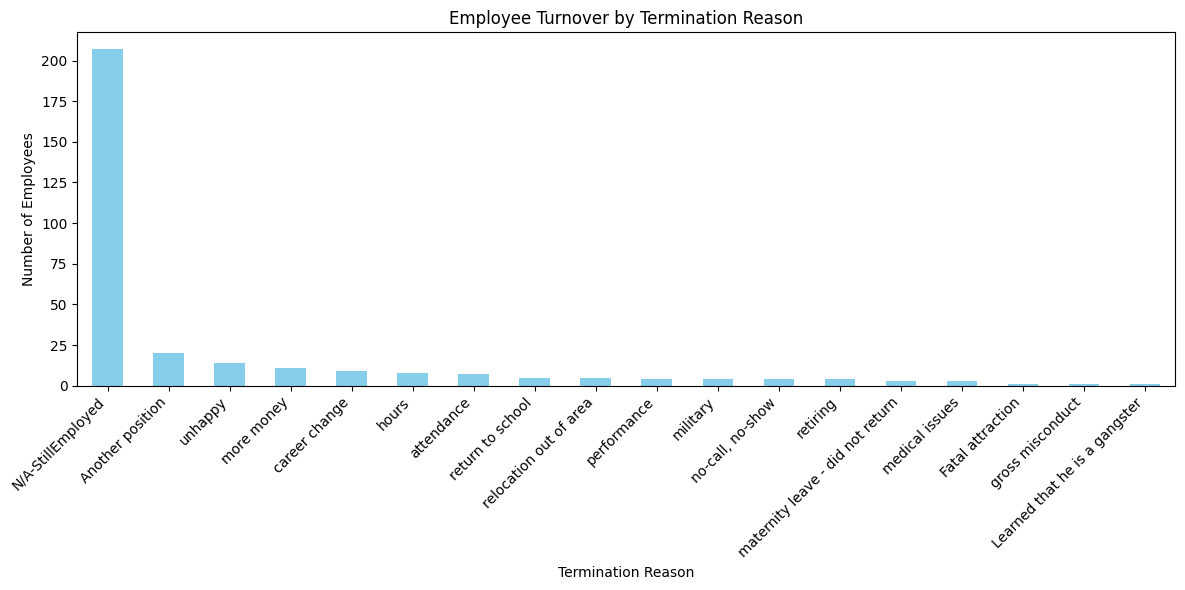

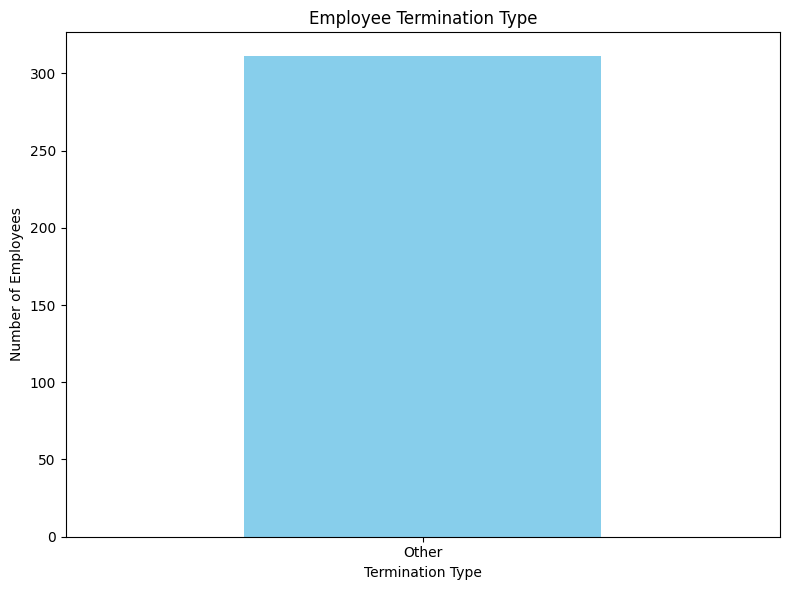

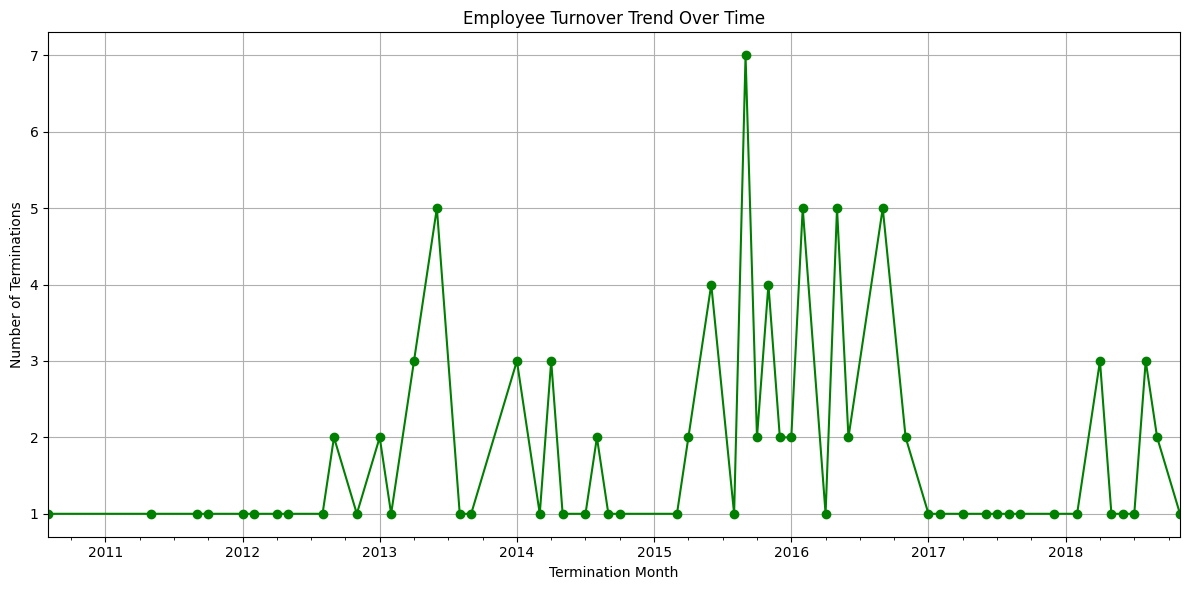


Descriptive statistics for TermReason
count                   311
unique                   18
top       N/A-StillEmployed
freq                    207
Name: TermReason, dtype: object

Descriptive statistics for TermType
TermType
Other    311
Name: count, dtype: int64

Employee Turnover analysis finished.


In [58]:
# --- Employee Turnover Analysis ---

# 1. Turnover by Reason
turnover_by_reason = hrd.groupby('TermReason')['Employee_Name'].count().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
turnover_by_reason.plot(kind='bar', color='skyblue')
plt.title('Employee Turnover by Termination Reason')
plt.xlabel('Termination Reason')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Segmentation of Termination Reasons
# You can segment the TermReason based on voluntary/involuntary
# create a new column, called TermType
hrd['TermType'] = hrd['TermReason'].apply(lambda x: 'Voluntary' if 'Voluntarily' in x else ('Involuntary' if 'Terminated' in x else 'Other'))

# Plot Termination type
term_type_counts = hrd['TermType'].value_counts()
plt.figure(figsize=(8, 6))
term_type_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Employee Termination Type')
plt.xlabel('Termination Type')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 3. Turnover Over Time (Trend Analysis)
# Create a month and year column for Date of Termination for trend analysis
hrd['TerminationMonth'] = hrd['DateofTermination'].dt.to_period('M')

turnover_over_time = hrd.groupby('TerminationMonth')['Employee_Name'].count()

plt.figure(figsize=(12, 6))
turnover_over_time.plot(kind='line', color='green', marker='o')
plt.title('Employee Turnover Trend Over Time')
plt.xlabel('Termination Month')
plt.ylabel('Number of Terminations')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Descriptive statistics for TermReason and TermType
print("\nDescriptive statistics for TermReason")
print(hrd['TermReason'].describe())
print("\nDescriptive statistics for TermType")
print(hrd['TermType'].value_counts())

print("\nEmployee Turnover analysis finished.")

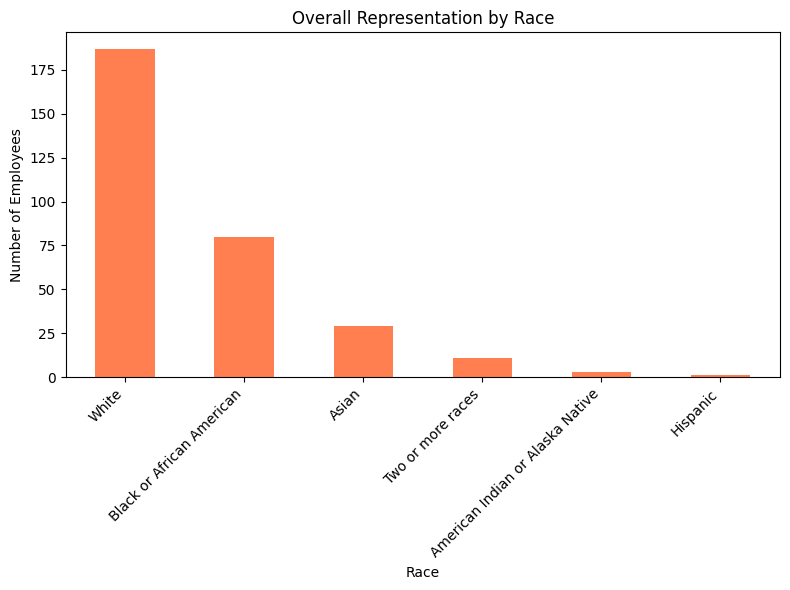

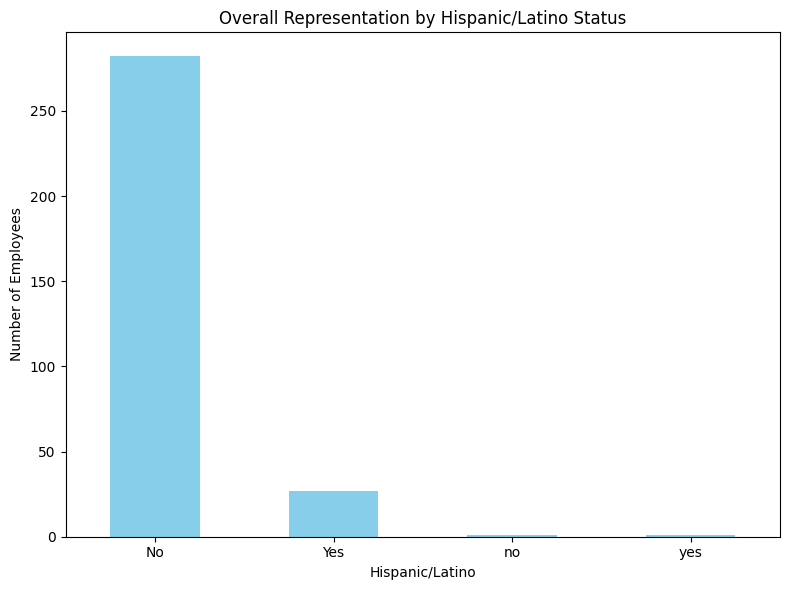

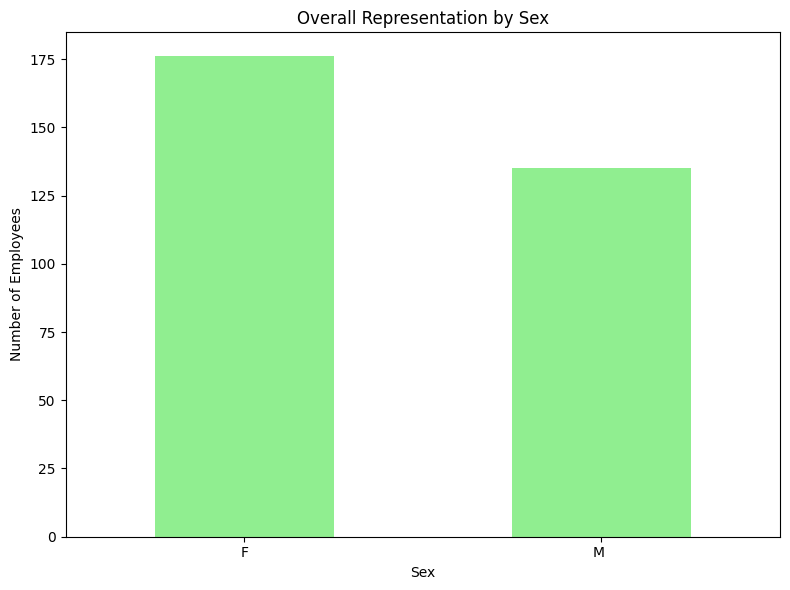

/tmp/ipykernel_106/3192600400.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = df.groupby([department_column, group_column]).size().unstack(fill_value=0)


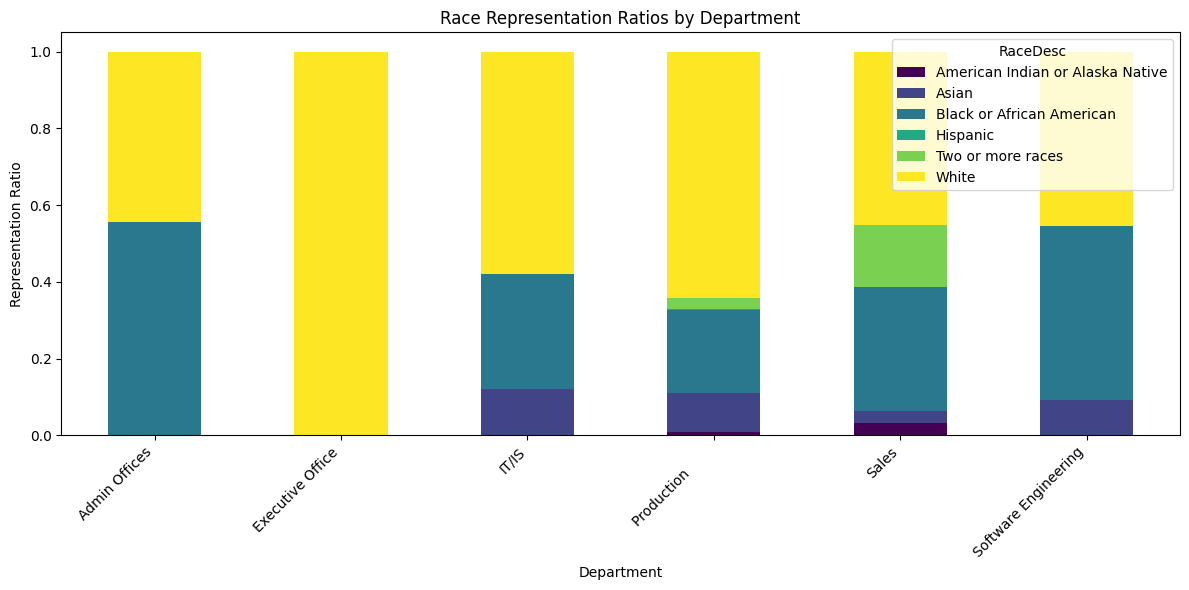

/tmp/ipykernel_106/3192600400.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = df.groupby([department_column, group_column]).size().unstack(fill_value=0)


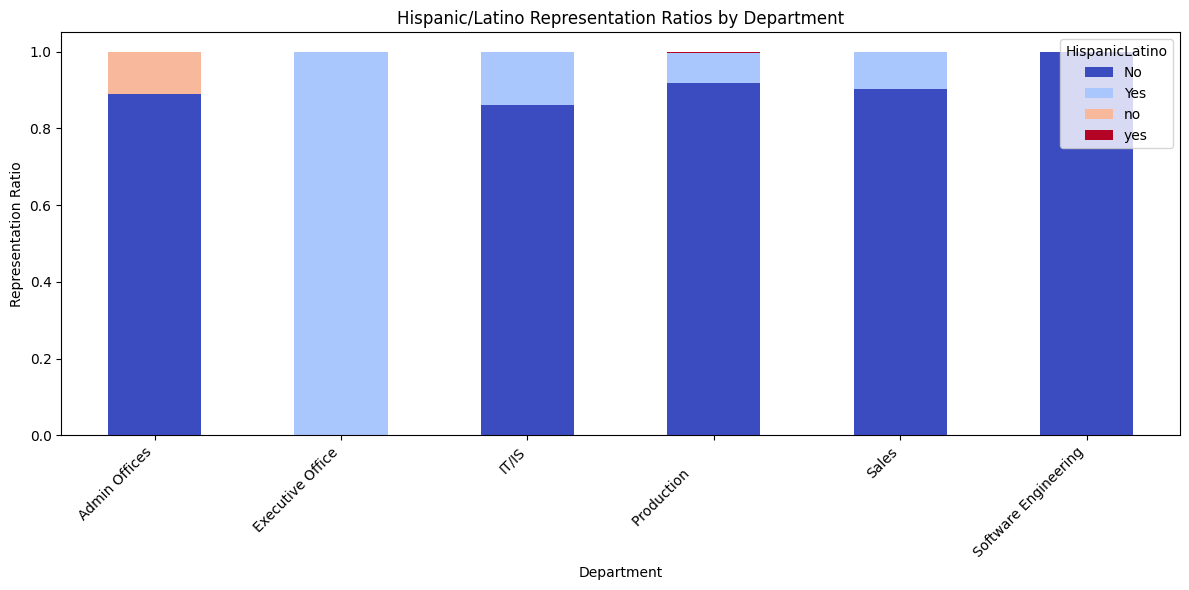

/tmp/ipykernel_106/3192600400.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = df.groupby([department_column, group_column]).size().unstack(fill_value=0)


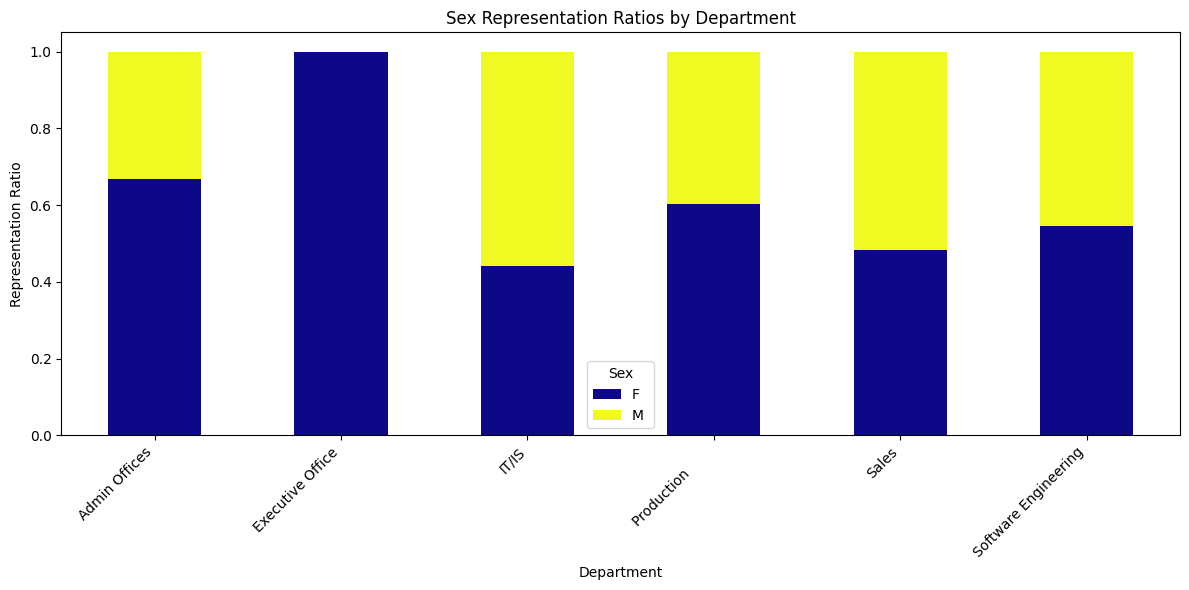


Descriptive Statistics for Overall Representation
RaceDesc
White                               187
Black or African American            80
Asian                                29
Two or more races                    11
American Indian or Alaska Native      3
Hispanic                              1
Name: count, dtype: int64
HispanicLatino
No     282
Yes     27
no       1
yes      1
Name: count, dtype: int64
Sex
F     176
M     135
Name: count, dtype: int64

Diversity and Inclusion analysis finished.


In [59]:
# --- Diversity and Inclusion Analysis ---

# 1. Overall Representation
plt.figure(figsize=(8, 6))
hrd['RaceDesc'].value_counts().plot(kind='bar', color='coral')
plt.title('Overall Representation by Race')
plt.xlabel('Race')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
hrd['HispanicLatino'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Overall Representation by Hispanic/Latino Status')
plt.xlabel('Hispanic/Latino')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
hrd['Sex'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Overall Representation by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. Departmental Representation Ratios
def calculate_representation_ratios(df, group_column, department_column):
    """Calculates representation ratios for a demographic group within each department."""
    group_counts = df.groupby([department_column, group_column]).size().unstack(fill_value=0)
    department_totals = group_counts.sum(axis=1)
    ratios = group_counts.div(department_totals, axis=0)
    return ratios

# Race representation ratios
race_ratios = calculate_representation_ratios(hrd, 'RaceDesc', 'Department')
race_ratios.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Race Representation Ratios by Department')
plt.xlabel('Department')
plt.ylabel('Representation Ratio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Hispanic/Latino representation ratios
hispanic_ratios = calculate_representation_ratios(hrd, 'HispanicLatino', 'Department')
hispanic_ratios.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Hispanic/Latino Representation Ratios by Department')
plt.xlabel('Department')
plt.ylabel('Representation Ratio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Sex representation ratios
sex_ratios = calculate_representation_ratios(hrd, 'Sex', 'Department')
sex_ratios.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='plasma')
plt.title('Sex Representation Ratios by Department')
plt.xlabel('Department')
plt.ylabel('Representation Ratio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
#3 Descriptive Statistics
print("\nDescriptive Statistics for Overall Representation")
print(hrd['RaceDesc'].value_counts())
print(hrd['HispanicLatino'].value_counts())
print(hrd['Sex'].value_counts())

print("\nDiversity and Inclusion analysis finished.")

/tmp/ipykernel_106/3806290386.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='EngagementSurvey', y='EmpSatisfaction', data=hrd, palette='viridis')


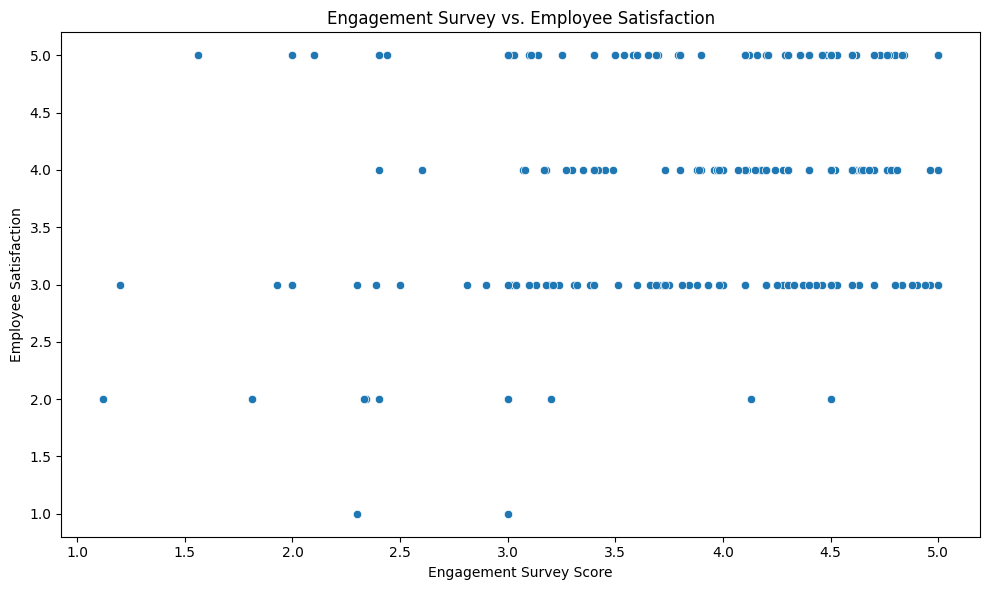

/tmp/ipykernel_106/3806290386.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='EngagementSurvey', y='PerformanceScoreNumeric', data=hrd, palette='magma')


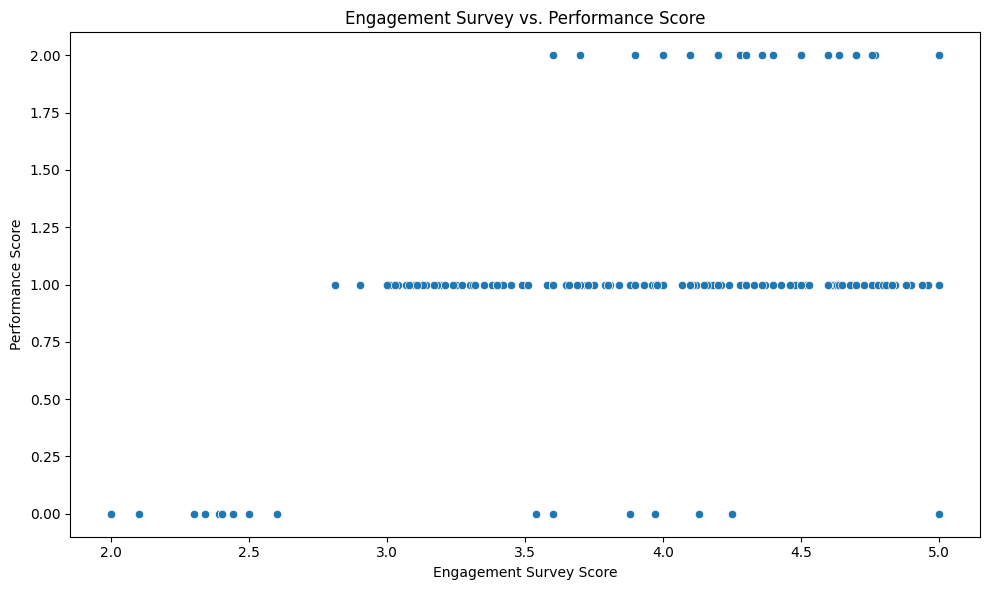

/tmp/ipykernel_106/3806290386.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='EngagementSurvey', y='Absences', data=hrd, palette='coolwarm')


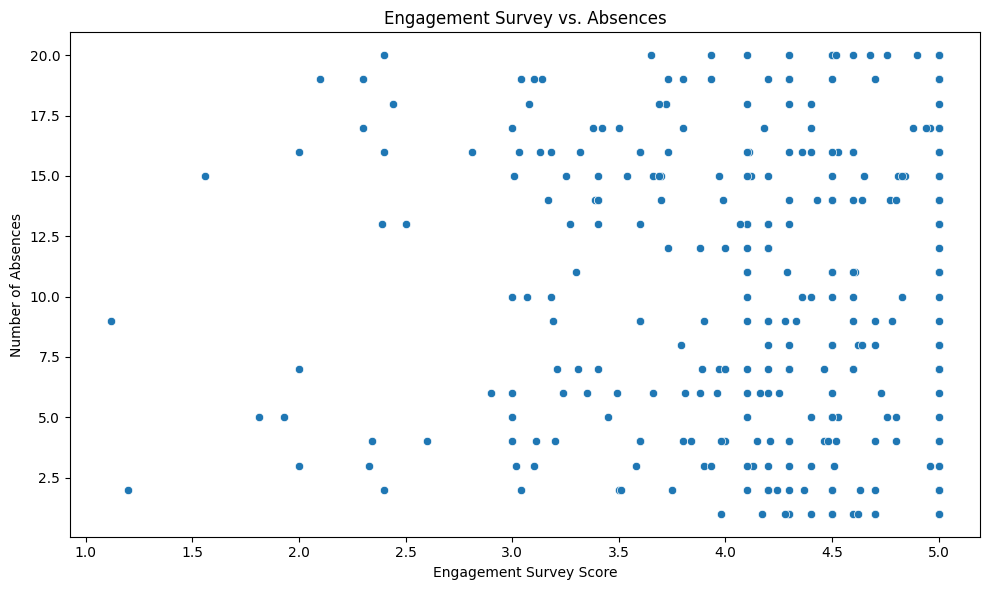

/tmp/ipykernel_106/3806290386.py:32: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='EmpSatisfaction', y='PerformanceScoreNumeric', data=hrd, palette='Set2')


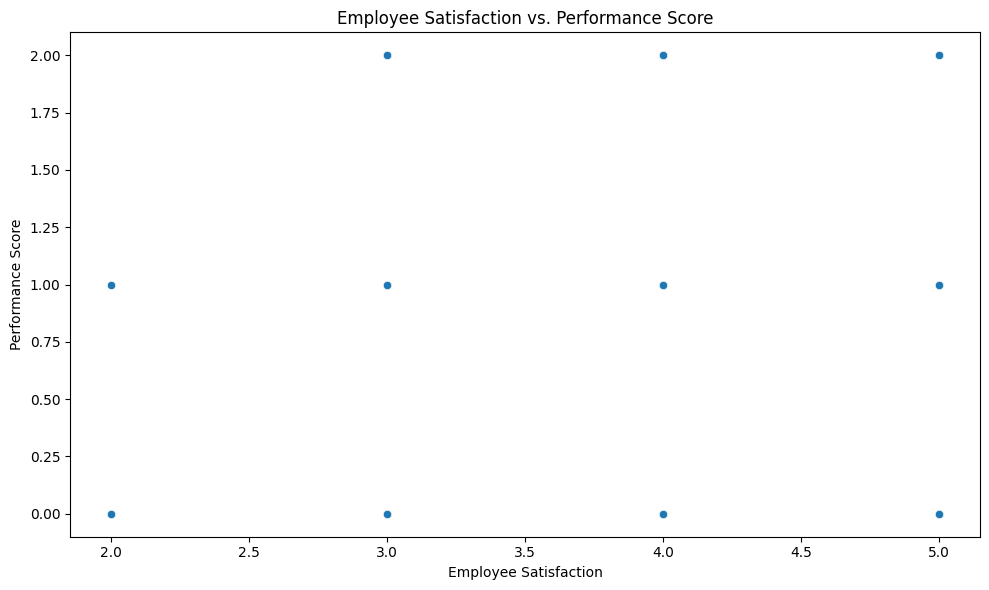

/tmp/ipykernel_106/3806290386.py:40: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='EmpSatisfaction', y='Absences', data=hrd, palette='Set3')


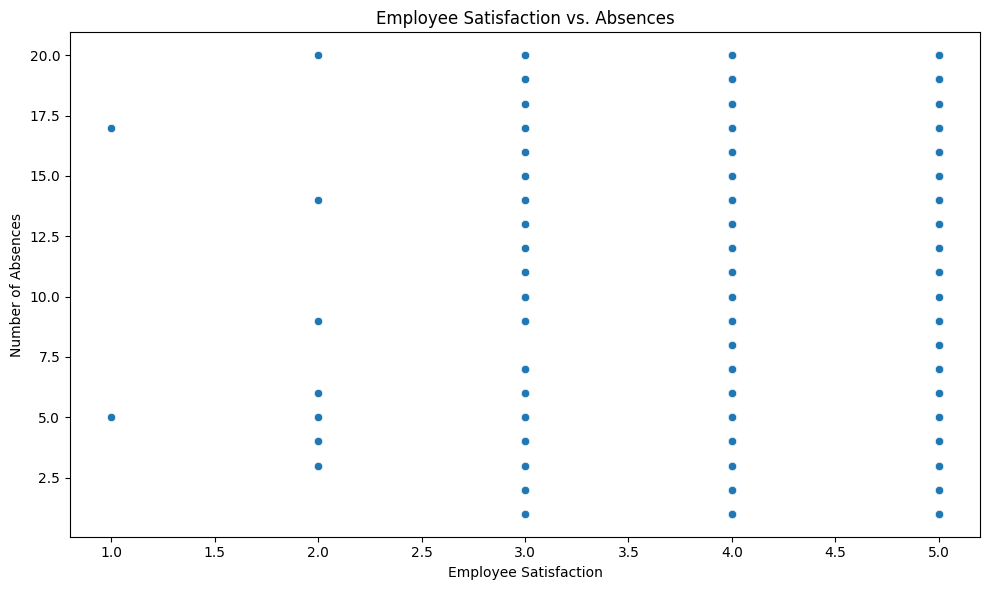

/tmp/ipykernel_106/3806290386.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PerformanceScoreNumeric', y='Absences', data=hrd, palette='viridis')


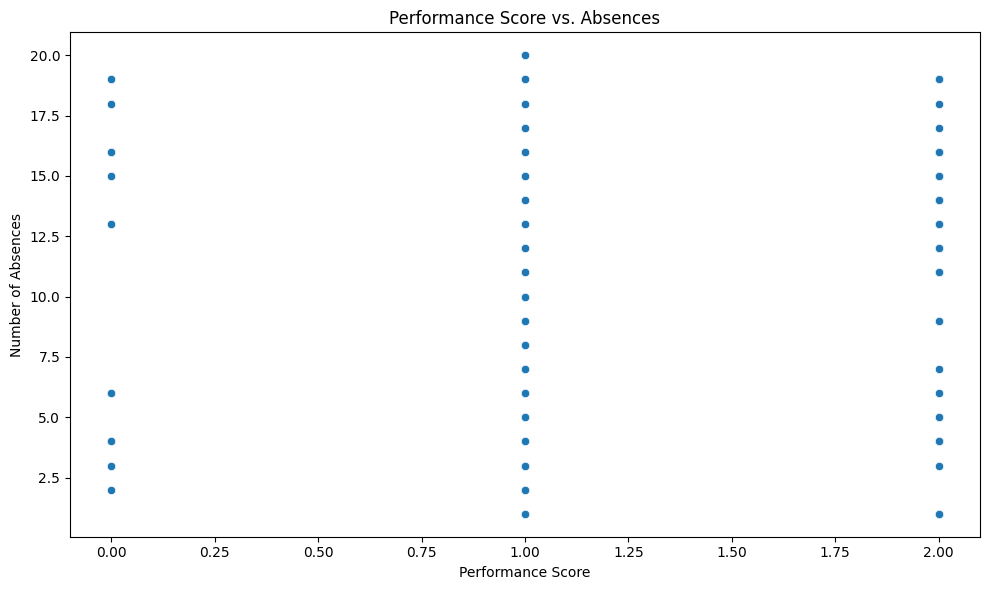

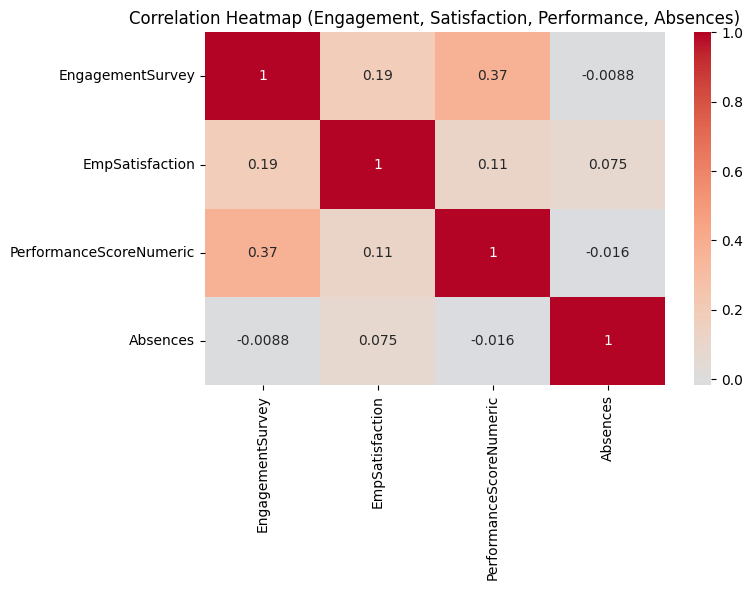


Descriptive Statistics for Engagement and Satisfaction
       EngagementSurvey  EmpSatisfaction  PerformanceScoreNumeric    Absences
count        311.000000       311.000000               298.000000  311.000000
mean           4.110000         3.890675                 1.063758   10.237942
std            0.789938         0.909241                 0.425566    5.852596
min            1.120000         1.000000                 0.000000    1.000000
25%            3.690000         3.000000                 1.000000    5.000000
50%            4.280000         4.000000                 1.000000   10.000000
75%            4.700000         5.000000                 1.000000   15.000000
max            5.000000         5.000000                 2.000000   20.000000

Employee Engagement and Satisfaction analysis finished.


In [60]:
# --- Employee Engagement and Satisfaction Analysis ---

# 1. Convert PerformanceScore to Numerical
hrd['PerformanceScoreNumeric'] = hrd['PerformanceScore'].map({'Exceeds': 2, 'Fully Meets': 1, 'Needs Improvement': 0})

# 2. Scatter Plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EngagementSurvey', y='EmpSatisfaction', data=hrd, palette='viridis')
plt.title('Engagement Survey vs. Employee Satisfaction')
plt.xlabel('Engagement Survey Score')
plt.ylabel('Employee Satisfaction')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='EngagementSurvey', y='PerformanceScoreNumeric', data=hrd, palette='magma')
plt.title('Engagement Survey vs. Performance Score')
plt.xlabel('Engagement Survey Score')
plt.ylabel('Performance Score')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='EngagementSurvey', y='Absences', data=hrd, palette='coolwarm')
plt.title('Engagement Survey vs. Absences')
plt.xlabel('Engagement Survey Score')
plt.ylabel('Number of Absences')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='EmpSatisfaction', y='PerformanceScoreNumeric', data=hrd, palette='Set2')
plt.title('Employee Satisfaction vs. Performance Score')
plt.xlabel('Employee Satisfaction')
plt.ylabel('Performance Score')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='EmpSatisfaction', y='Absences', data=hrd, palette='Set3')
plt.title('Employee Satisfaction vs. Absences')
plt.xlabel('Employee Satisfaction')
plt.ylabel('Number of Absences')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PerformanceScoreNumeric', y='Absences', data=hrd, palette='viridis')
plt.title('Performance Score vs. Absences')
plt.xlabel('Performance Score')
plt.ylabel('Number of Absences')
plt.tight_layout()
plt.show()

# 3. Correlation Analysis
correlation_matrix = hrd[['EngagementSurvey', 'EmpSatisfaction', 'PerformanceScoreNumeric', 'Absences']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (Engagement, Satisfaction, Performance, Absences)')
plt.tight_layout()
plt.show()
#4 Descriptive Statistics
print("\nDescriptive Statistics for Engagement and Satisfaction")
print(hrd[['EngagementSurvey','EmpSatisfaction','PerformanceScoreNumeric', 'Absences']].describe())

print("\nEmployee Engagement and Satisfaction analysis finished.")

/tmp/ipykernel_106/3609523690.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Department', y='Salary', data=hrd, palette='Set3')


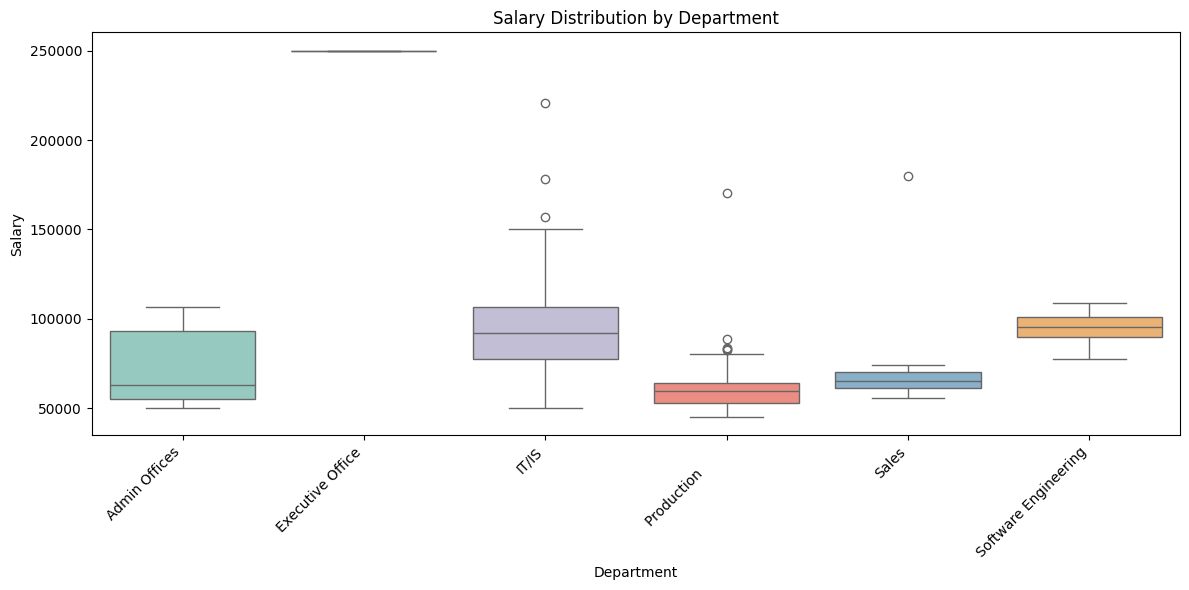

/tmp/ipykernel_106/3609523690.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Position', y='Salary', data=hrd, palette='viridis')


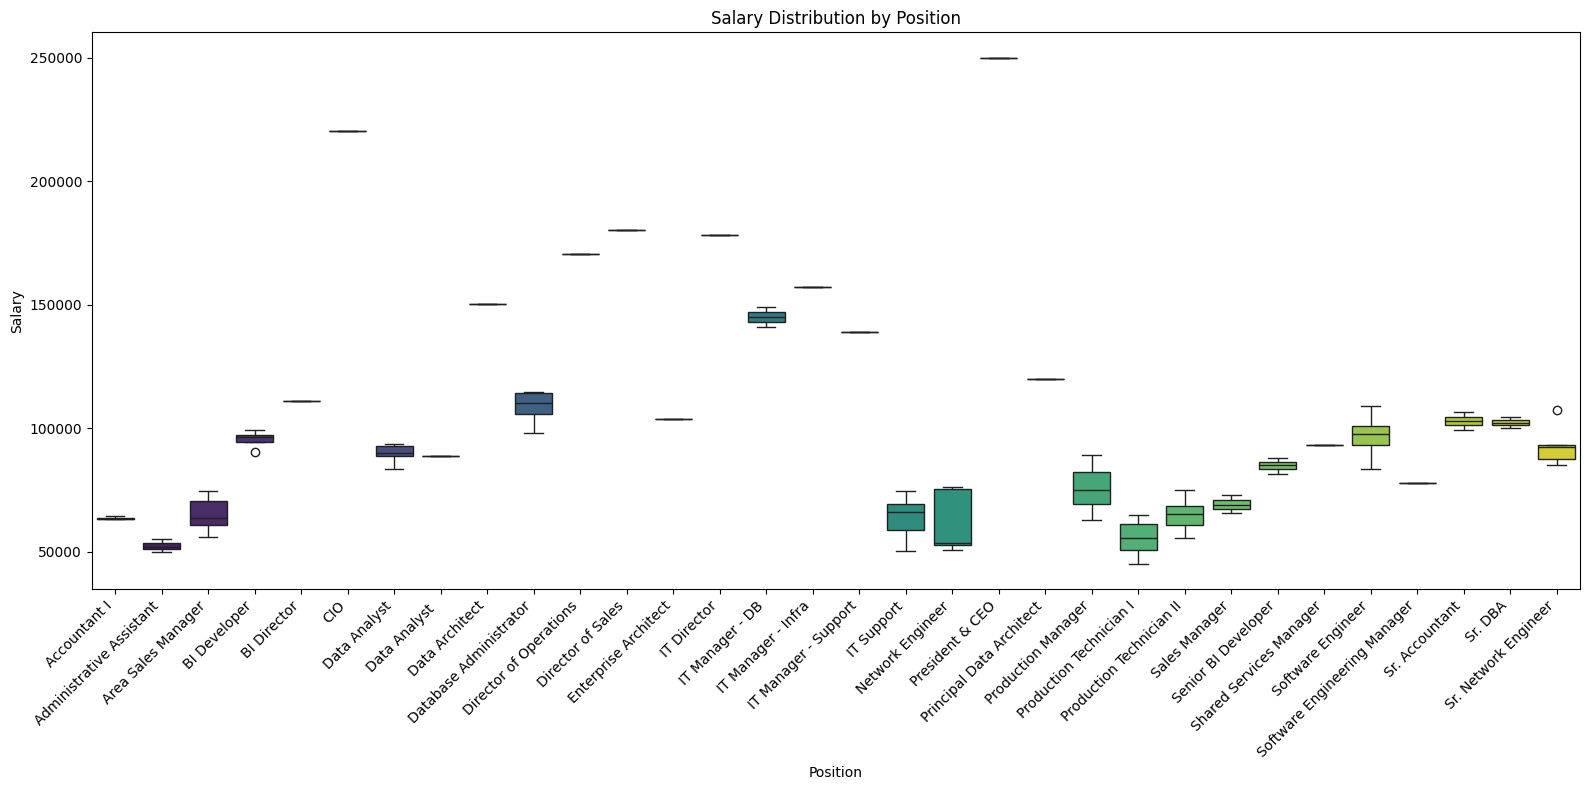

/tmp/ipykernel_106/3609523690.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PerformanceScore', y='Salary', data=hrd, palette='coolwarm')


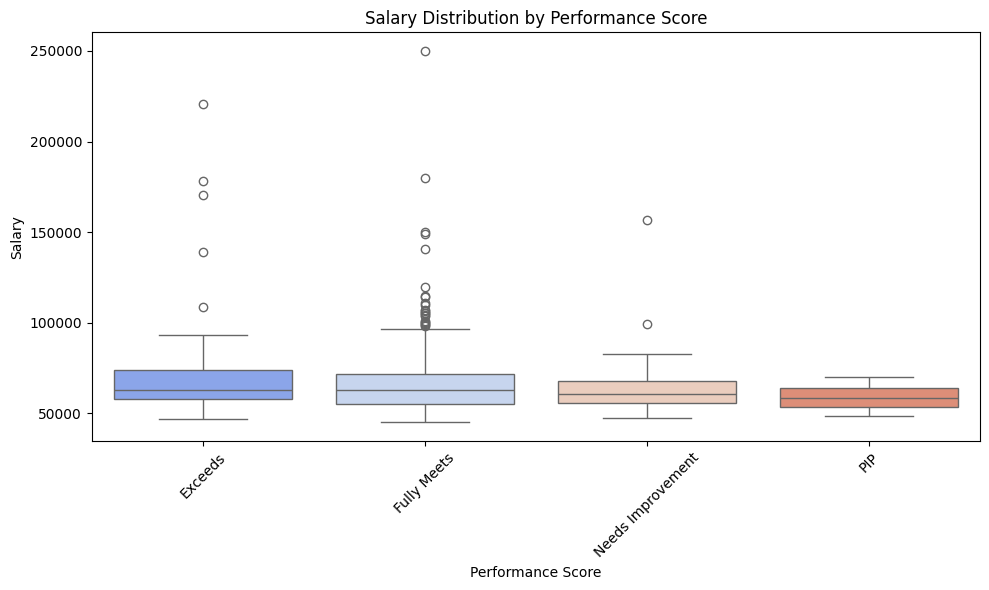

/tmp/ipykernel_106/3609523690.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='Salary', data=hrd, palette='Set2')


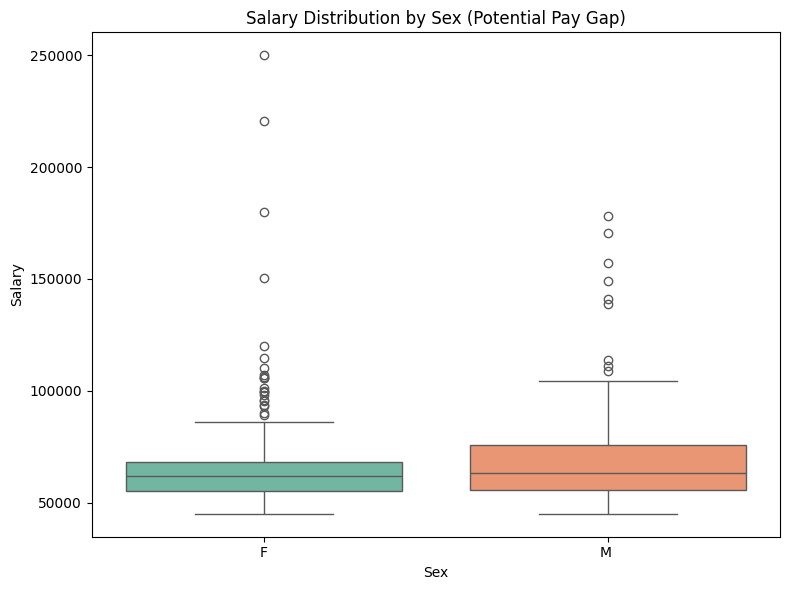

/tmp/ipykernel_106/3609523690.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(hrd.groupby('Department')['Salary'].describe())
/tmp/ipykernel_106/3609523690.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(hrd.groupby('Position')['Salary'].describe())
/tmp/ipykernel_106/3609523690.py:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(hrd.groupby('PerformanceScore')['Salary'].describe())



Descriptive statistics for Salary by department
                      count           mean           std       min        25%  \
Department                                                                      
Admin Offices           9.0   71791.888889  21706.397164   49920.0   55000.00   
Executive Office        1.0  250000.000000           NaN  250000.0  250000.00   
IT/IS                  50.0   97064.640000  33209.612190   50178.0   77417.75   
Production            209.0   59953.545455  11422.656822   45046.0   53018.00   
Sales                  31.0   69061.258065  21271.393236   55875.0   61561.50   
Software Engineering   11.0   94989.454545   9566.505698   77692.0   89601.50   

                           50%       75%       max  
Department                                          
Admin Offices          63003.0   93046.0  106367.0  
Executive Office      250000.0  250000.0  250000.0  
IT/IS                  92328.5  106844.5  220450.0  
Production             59472.0   6406

<Figure size 640x480 with 0 Axes>

/tmp/ipykernel_106/3609523690.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Position', y='Salary', data=hrd, palette='viridis')


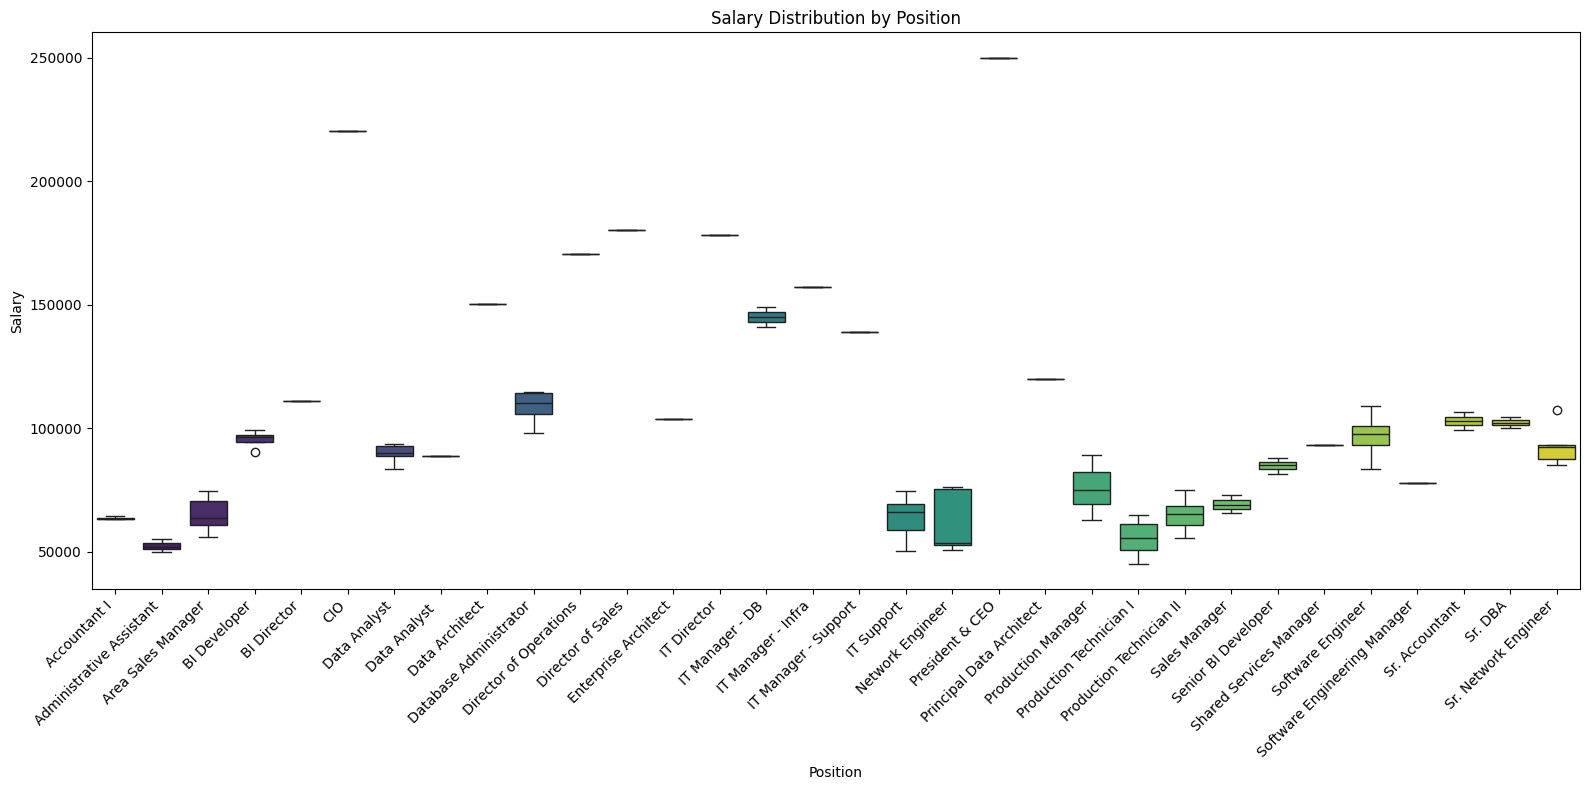

/tmp/ipykernel_106/3609523690.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PerformanceScore', y='Salary', data=hrd, palette='coolwarm')


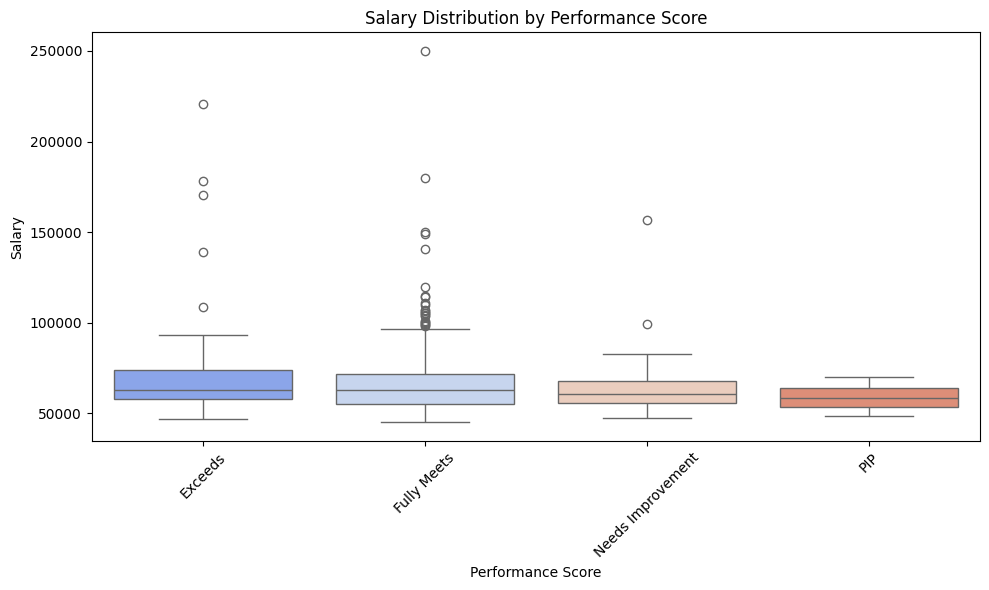

/tmp/ipykernel_106/3609523690.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='Salary', data=hrd, palette='Set2')


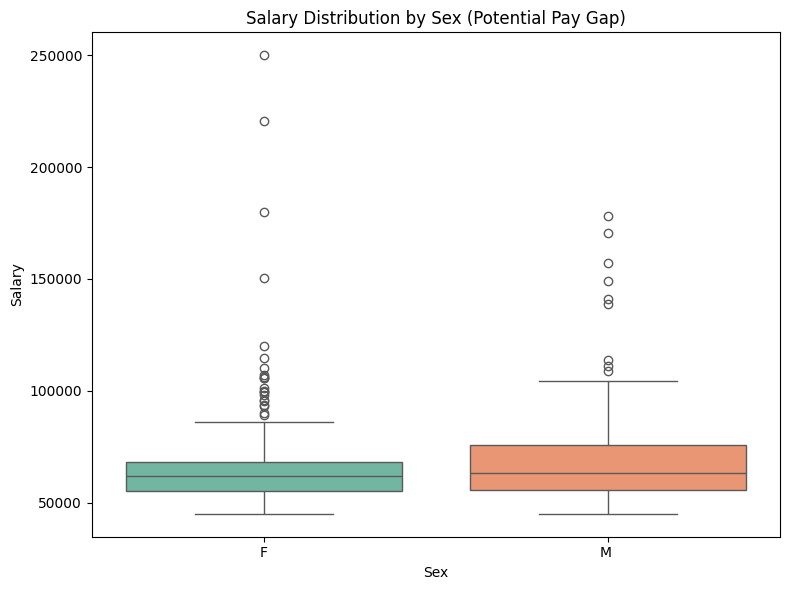

/tmp/ipykernel_106/3609523690.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(hrd.groupby('Department')['Salary'].describe())
/tmp/ipykernel_106/3609523690.py:89: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(hrd.groupby('Position')['Salary'].describe())



Descriptive statistics for Salary by department
                      count           mean           std       min        25%  \
Department                                                                      
Admin Offices           9.0   71791.888889  21706.397164   49920.0   55000.00   
Executive Office        1.0  250000.000000           NaN  250000.0  250000.00   
IT/IS                  50.0   97064.640000  33209.612190   50178.0   77417.75   
Production            209.0   59953.545455  11422.656822   45046.0   53018.00   
Sales                  31.0   69061.258065  21271.393236   55875.0   61561.50   
Software Engineering   11.0   94989.454545   9566.505698   77692.0   89601.50   

                           50%       75%       max  
Department                                          
Admin Offices          63003.0   93046.0  106367.0  
Executive Office      250000.0  250000.0  250000.0  
IT/IS                  92328.5  106844.5  220450.0  
Production             59472.0   6406

/tmp/ipykernel_106/3609523690.py:91: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(hrd.groupby('PerformanceScore')['Salary'].describe())


In [61]:
# --- Salary Distribution Analysis ---

# 1. Convert PerformanceScore to Numerical
hrd['PerformanceScoreNumeric'] = hrd['PerformanceScore'].map({'Exceeds': 2, 'Fully Meets': 1, 'Needs Improvement': 0})

# 2. Salary Distribution by Department (Box Plot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='Salary', data=hrd, palette='Set3')
plt.title('Salary Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Salary Distribution by Position (Box Plot)
plt.figure(figsize=(16, 8))
sns.boxplot(x='Position', y='Salary', data=hrd, palette='viridis')
plt.title('Salary Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Salary Distribution by Performance Score (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='PerformanceScore', y='Salary', data=hrd, palette='coolwarm')
plt.title('Salary Distribution by Performance Score')
plt.xlabel('Performance Score')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Potential Pay Gaps (by Sex - Example)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Salary', data=hrd, palette='Set2')
plt.title('Salary Distribution by Sex (Potential Pay Gap)')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

#6. Descriptive statistics
print("\nDescriptive statistics for Salary by department")
print(hrd.groupby('Department')['Salary'].describe())
print("\nDescriptive statistics for Salary by Position")
print(hrd.groupby('Position')['Salary'].describe())
print("\nDescriptive statistics for Salary by Performance")
print(hrd.groupby('PerformanceScore')['Salary'].describe())
print("\nSalary distribution analysis finished.")
plt.tight_layout()
plt.show()

# 3. Salary Distribution by Position (Box Plot)
plt.figure(figsize=(16, 8))
sns.boxplot(x='Position', y='Salary', data=hrd, palette='viridis')
plt.title('Salary Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Salary Distribution by Performance Score (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='PerformanceScore', y='Salary', data=hrd, palette='coolwarm')
plt.title('Salary Distribution by Performance Score')
plt.xlabel('Performance Score')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Potential Pay Gaps (by Sex - Example)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Salary', data=hrd, palette='Set2')
plt.title('Salary Distribution by Sex (Potential Pay Gap)')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

#6. Descriptive statistics
print("\nDescriptive statistics for Salary by department")
print(hrd.groupby('Department')['Salary'].describe())
print("\nDescriptive statistics for Salary by Position")
print(hrd.groupby('Position')['Salary'].describe())
print("\nDescriptive statistics for Salary by Performance")
print(hrd.groupby('PerformanceScore')['Salary'].describe())
print("\nSalary distribution analysis finished.")

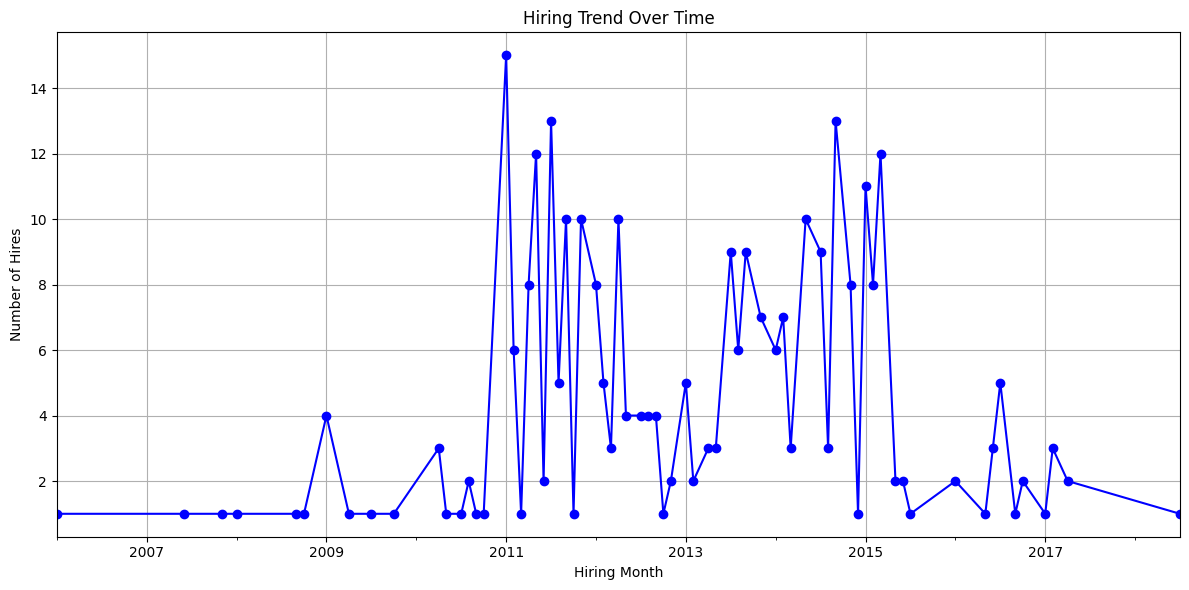

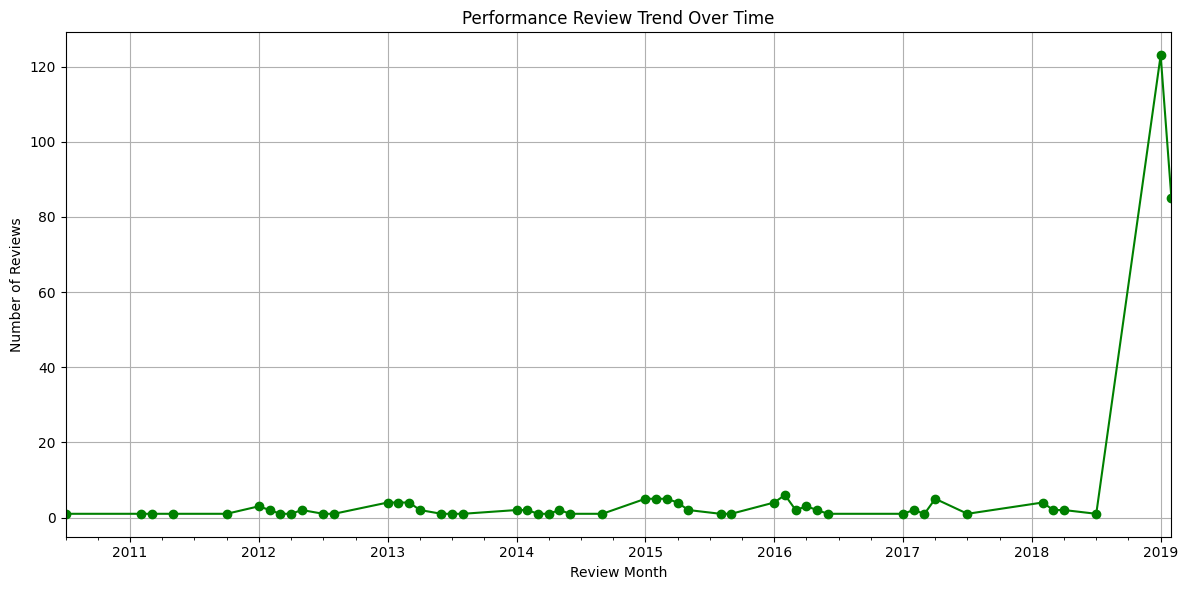

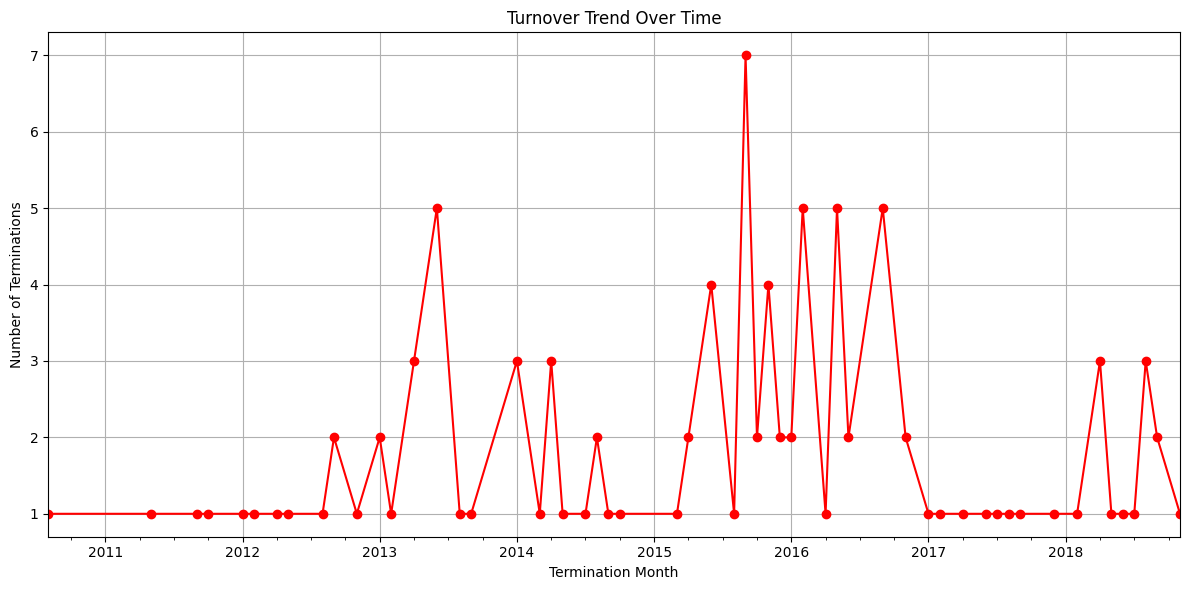


Time series analysis finished.


In [62]:
# --- Time Series Analysis ---

# 1. Hiring Trend
# Create a new column to get year and month
hrd['HiringMonth'] = hrd['DateofHire'].dt.to_period('M')
hiring_trend = hrd.groupby('HiringMonth')['Employee_Name'].count()

plt.figure(figsize=(12, 6))
hiring_trend.plot(kind='line', color='blue', marker='o')
plt.title('Hiring Trend Over Time')
plt.xlabel('Hiring Month')
plt.ylabel('Number of Hires')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Performance Review Trend
hrd['ReviewMonth'] = hrd['LastPerformanceReview_Date'].dt.to_period('M')
review_trend = hrd.groupby('ReviewMonth')['Employee_Name'].count()

plt.figure(figsize=(12, 6))
review_trend.plot(kind='line', color='green', marker='o')
plt.title('Performance Review Trend Over Time')
plt.xlabel('Review Month')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Turnover Trend
hrd['TerminationMonth'] = hrd['DateofTermination'].dt.to_period('M')
turnover_trend = hrd.groupby('TerminationMonth')['Employee_Name'].count()

plt.figure(figsize=(12, 6))
turnover_trend.plot(kind='line', color='red', marker='o')
plt.title('Turnover Trend Over Time')
plt.xlabel('Termination Month')
plt.ylabel('Number of Terminations')
plt.grid(True)
plt.tight_layout()
plt.show()
print("\nTime series analysis finished.")